    # Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2023
## Домашнее задание 4. Линейные модели
### Дедлайн --- 4 декабря 2023 23:59

In [1]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=11oDZ6JvJS0xP_u_YE55IFoX1C8TzDKQB

Downloading...
From: https://drive.google.com/uc?id=11oDZ6JvJS0xP_u_YE55IFoX1C8TzDKQB
To: D:\PyCharmProjects\Stats\train.csv

  0%|          | 0.00/461k [00:00<?, ?B/s]
100%|##########| 461k/461k [00:00<00:00, 2.91MB/s]
100%|##########| 461k/461k [00:00<00:00, 2.91MB/s]


In [2]:
import numpy as np
from scipy import stats as sps
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(font_scale=1.4, style='whitegrid')
%config InlineBackend.figure_format='retina'

В учебных целях в первой задаче запрещено использовать готовые реализации линейной регрессии (например, из пакета *scikit-learn*).

In [3]:
import warnings
warnings.filterwarnings('ignore')

Добавил перед отправкой чтобы warning'и не мешались

## Задача 1 (10 баллов)

На полигоне испытывается новая модель трамвая. В одном из испытаний работы двигателя проверяется, что движение трамвая равномерно. Для проведения теста на трамвай установлен датчик, посекундно измеряющий пройденное расстояние.

Записи датчика можно описать такой моделью:

 $$X_i = \beta_1+i\beta_2+\varepsilon_0+\ldots+\varepsilon_i,\, i= 0, 1, \ldots, n-1$$

где $X_i$ --- расстояние, которое проехал трамвай за $i$ секунд. В модели $\beta_1$ --- начальное расстояние, $\beta_2$ --- скорость трамвая, $\varepsilon_0$ --- ошибка начального показания датчика. Отсчет времени идет от предыдущего замера, причем отсчет происходит с ошибкой. Для $i = 1, \ldots, n-1$ величина $\varepsilon_i$ есть ошибка приращения расстояния, то есть $\varepsilon_i = \varepsilon_i^t \beta_2,$ где $\varepsilon_i^t$ --- ошибка отсчета времени. Все ошибки $\varepsilon_i$ независимы и распределены по закону $N(0, \sigma^2)$.

Сведите задачу к линейной модели и найдите оценки наименьших квадратов для начального расстояния $\beta_1$ и скорости $\beta_2,$ а также несмещенную оценку для $\sigma^2,$ из которой выразите оценку дисперсии отсчета времени.

Данные возьмите из файла Regression.csv. Сделайте выводы.

### Решение

Загрузим датасет, содержащий показания датчика.

In [4]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1gmSof1yxWt009QoBiKjwkLMlcpn3r61W

Access denied with the following error:



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1gmSof1yxWt009QoBiKjwkLMlcpn3r61W 



In [5]:
X = np.genfromtxt('regression.csv')
print('Размер датасета:', X.shape)
print('Средняя скорость:', X[-1] / X.shape[0])

Размер датасета: (1000,)
Средняя скорость: 12.0408175


Датасет состоит из 1000 измерений. По смыслу средняя скорость имеет размерность метры в секунду.

In [6]:
from scipy import integrate
def f(x):
  return np.exp(x)*(x**2)
v, err = integrate.quad(f, -1, 1, points=[0])
v,err

(0.8788846226018336, 9.75757944001547e-15)

Визуализируйте выборку и сделайте выводы о том, верно ли что линейная регрессионная модель имеет смысл

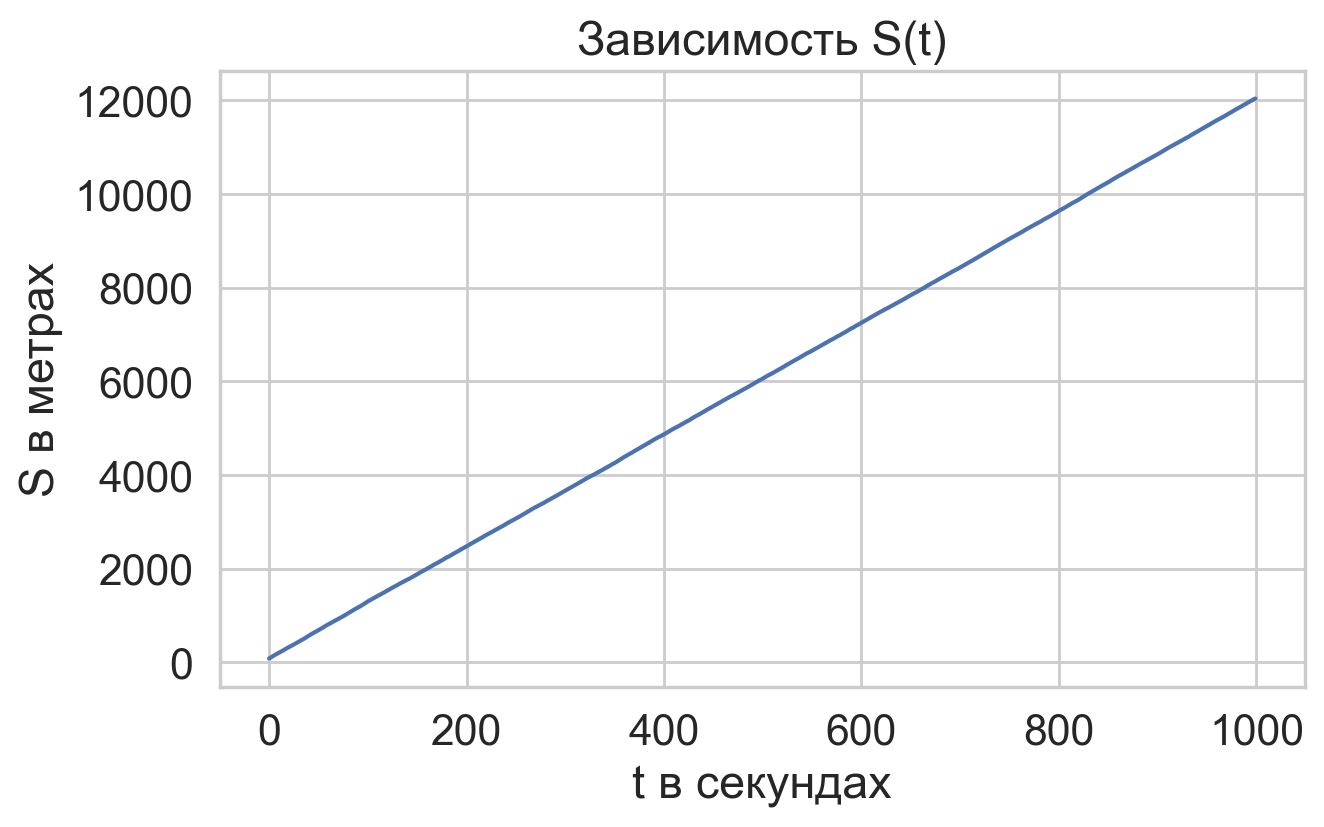

In [7]:
plt.figure(figsize=(7,4))
plt.plot(X)
plt.title("Зависимость S(t)")
plt.xlabel("t в секундах")
plt.ylabel("S в метрах")
plt.show()

Из графика определённо заключаем целесообразность рассмотрения линейной регрессионной модели (линейность означает, что скорость постоянная и равна коэффициенту наклона)

#### 1. Сведите задачу к гауссовской линейной модели (определения брать из основного курса)

#### 2. Распишите и проверьте требования к гауссовской линейной модели

Преамбула с используемыми макросами

$\renewcommand{\phi}{\varphi}$
$\renewcommand{\kappa}{\varkappa}$
$\renewcommand{\empty}{\varnothing}$
$\renewcommand{\le}{\ \leqslant\ }$
$\renewcommand{\ge}{\ \geqslant\ }$
$\renewcommand{\d}{\partial}$
$\newcommand{\grad}{\nabla}$
$\renewcommand{\l}{\left}$
$\renewcommand{\r}{\right}$
$\newcommand{\lr}[1]{\left(#1\right)}$
$\newcommand{\la}{\langle}$
$\newcommand{\ra}{\rangle}$
$\newcommand{\lara}[1]{\langle#1\rangle}$
$\newcommand{\eps}{\varepsilon}$
$\newcommand{\bb}[1]{\mathbb{#1}}$
$\newcommand{\bf}[1]{\mathbf{#1}}$
$\renewcommand{\tild}[1]{\widetilde{#1}}$
$\renewcommand{\hat}[1]{\widehat{#1}}$
$\newcommand{\norm}[1]{\left|\left|#1\right|\right|}$
$\renewcommand{\qed}{\hspace{1cm} \blacktriangleright}$

Стандартная линейная модель имеет вид $$ (1) \hspace{5 cm} X_i = \sum_{j=1}^k \theta_jZ_{ij} + \tild{\eps}_i,\ i = 0, \ldots, n-1$$
У нас же шум представлен как $\tild{\eps}_i = \eps_0 + \ldots + \eps_i$
Параметр $\theta$ есть столбец $(\beta_1, \beta_2)^T$, то есть в нашем случае количество столбцов $k=2$
$$
\theta =
\begin{pmatrix}
\beta_1\\
\beta_2\\
\end{pmatrix}
$$
$Z$ есть матрица из $\bb{R}^{n \times 2}$, где $n = 1000$ $-$ число измерений
$Z_i = (1,\ i)$ есть $i-$тая строка (нумерация с нуля) матрицы $Z$, Значит, столбцы (нумерация с единицы) $-$ линейно независимы
$$
Z =
\begin{pmatrix}
1 & 0\\
1 & 1\\
1 & 2\\
\vdots & \vdots\\
1 & n-1
\end{pmatrix}
$$
Ковариационная матрица вектора $\eps$ равна $D\eps = \sigma^2V$, где 
$V = diag(1, 2, \ldots, n)$, ведь по условию все ошибки $\varepsilon_i$ независимы и распределены по закону $N(0, \sigma^2)$, а значит, $D\tild{\eps}_i = D\eps_0 + D\eps_1 + \ldots + D\eps_i = (i+1)\cdot \sigma^2$

$$
V =
\begin{pmatrix}
1 & 0 &\ldots & 0\\
0 & 2 &\ldots & 0\\
\vdots&\vdots & \ddots & \vdots\\
0 & 0 &\ldots & n
\end{pmatrix}
$$

Матрица $V$ положительно определена, значит существует положительно определённая матрица $V^{\frac{1}{2}}$ такая, что $V^{\frac{1}{2}} \cdot V^{\frac{1}{2}} = V$. 
Домножим равенство $(1)$ на $V^{-\frac{1}{2}}$ и получим классическую модель линейной регрессии
$$\tild{X} = \tild{Z}\theta + \tild{\tild{\eps}},$$ где $\tild{X} = V^{-\frac{1}{2}}X,\ \tild{Z} = V^{-\frac{1}{2}}Z,\ \tild{\tild{\eps}} = V^{-\frac{1}{2}}\tild{\eps}$
$\bf{L_1}$ Матожидание шума $\eps$ так и осталось нулевым, 
$\bf{L_2}$ Но теперь $D\tild{\tild{\eps}} = \sigma^2E_n$
$\bf{L_3}$ Столбцы матрицы $\tild{Z}$ линейно независимы (ведь мы домножили $Z$ слева на невырожденную матрицу $V^{-\frac{1}{2}}$) 

Значит, в оценке по МНК $\hat{\theta} = (\tild{Z}^T\tild{Z})^{-1}\tild{Z}^T\tild{X} = (Z^TV^{-1}Z)^{-1}Z^TV^{-1}X$
Несмещённая оценка параметра $\sigma^2$ есть $\hat{\sigma^2} = \dfrac{1}{n-k}\norm{\tild{X} - \tild{Z}\hat{\theta}}^2 = \dfrac{1}{n-2}\norm{\tild{X} - \tild{Z}\hat{\theta}}^2 = \dfrac{1}{n-2}\norm{V^{-\frac{1}{2}}X - V^{-\frac{1}{2}}Z\hat{\theta}}^2 = \dfrac{1}{n-2}\norm{V^{-\frac{1}{2}}\lr{X - Z\hat{\theta}}}^2$

Рекомендуется писать некоторое требование теоретически, описать способ его проверки и визуализировать проверяемые величины (мат. ожидания, дисперсии, зависимости).

В рамках этого задания наличие зависимости можно проверять исключительно визуально. Если у Вас есть желание разобраться самостоятельно в критериях независимости и коэффициентах корреляции, это поощряется (но не требуется)

Заметим, что в нашей модели $X_i = \beta_1 + i\beta_2 + \eps_0 + \ldots + \eps_i$ выполнено $X_{i+1} - X_i = \eps_{i+1} + \beta_2$
Построим новую выборку $Y$ из разностей:  $Y_i = X_{i+1} - X_i = \eps_{i+1} + \beta_2,\ i = 0, \ldots, n-2$.

In [8]:
n = X.shape[0]
Y = np.zeros(n-1)
for i in range(n-1):
    Y[i] = X[i+1] - X[i]
    
Y

array([11.8374, 12.8854, 13.7544, 12.2596, 13.686 , 11.1028, 13.0577,
       11.7081, 12.5932, 11.7263, 11.0626, 11.0556,  9.127 , 14.4141,
       10.4352, 13.6411, 12.0168, 13.3194, 10.8539, 12.887 , 11.0621,
       10.0028, 11.9987, 10.1905, 12.4261, 12.0576, 10.7615, 12.4526,
       11.2951, 11.5932, 12.4527, 13.0232, 12.3206, 10.8486, 10.6499,
       13.1297, 13.7958, 12.7236, 14.5806, 12.1084, 14.2494, 13.187 ,
       12.65  , 11.8201, 10.9709, 12.9174,  9.5133, 12.0429, 12.0213,
       11.5493, 12.7483, 13.3371, 12.5158, 11.4511, 13.5056, 12.7706,
       12.1555, 13.8081, 11.1647, 11.246 , 11.0341, 11.7792, 11.8403,
       12.6598, 12.1425, 11.6732, 10.4033, 11.3193, 11.6735, 12.0298,
        9.8981, 11.5774, 11.8634, 10.8482, 12.3335, 10.2569, 14.1169,
       13.3648, 13.2886, 12.4416, 12.5191, 13.3538, 11.8833, 10.077 ,
       14.4388, 13.7269, 12.637 ,  9.9118, 14.5663, 11.8382,  9.2136,
       10.8182, 13.2259, 13.1629, 14.0062, 12.988 , 14.4303, 12.4913,
       15.3036, 12.9

1. Матожидание шума очень мало:

In [9]:
noise = Y - np.mean(Y)
noise_mean = np.mean(noise)
noise_mean

-1.5345304828853014e-15

2. Дисперсия шума (компонент по-отдельности, то есть именно $\eps_i$, а не $\tild{\eps_i}$) есть диагональная матрица вида $\sigma E_n$:

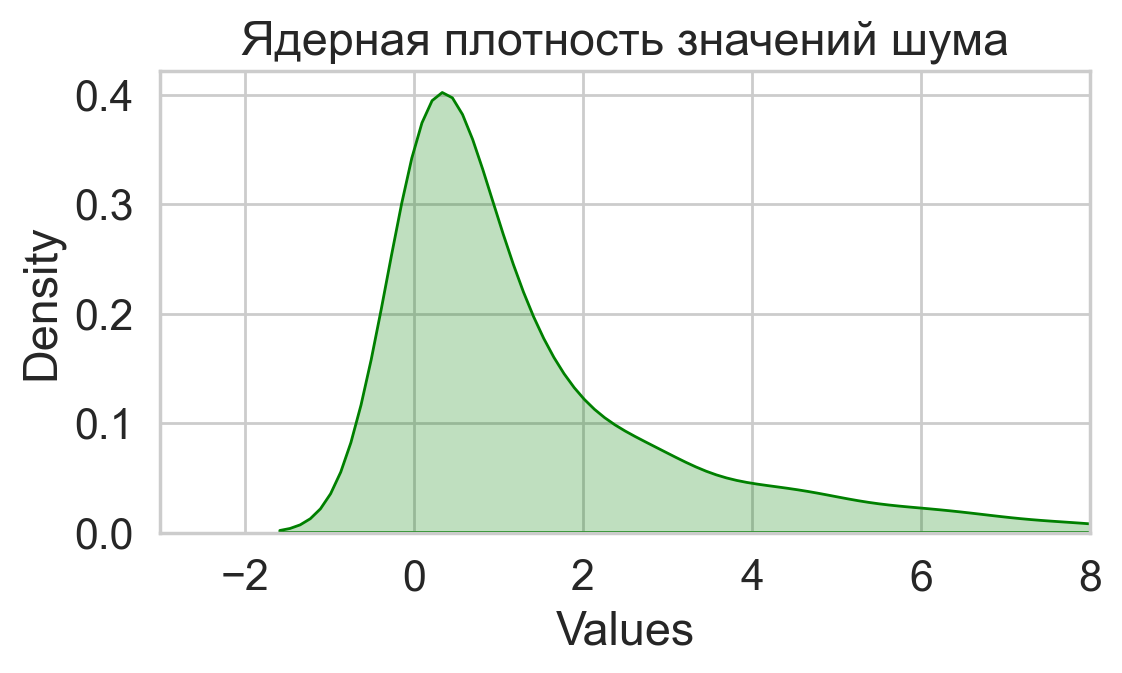

In [10]:
plt.figure(figsize=(6,3))
sns.kdeplot(np.square(noise) - np.square(noise_mean), fill=True, color='green')
plt.ylabel('Density')
plt.xlabel('Values')
plt.title('Ядерная плотность значений шума')
plt.xlim(-3, 8)
plt.show()

3. Линейная независимость столбцов:
Их всего два и мы уже указали их вид $-$ проверять нечего

Проверьте, что ошибка нормальна. Для этого можно использовать QQ-plot. Если хотите, можете использовать критерии нормальности

Нормальность ошибки в модели равносильна нормальности выборки из разностей:
$Y_i = X_i - X_{i-1},\ i = 1, \ldots, n-1$

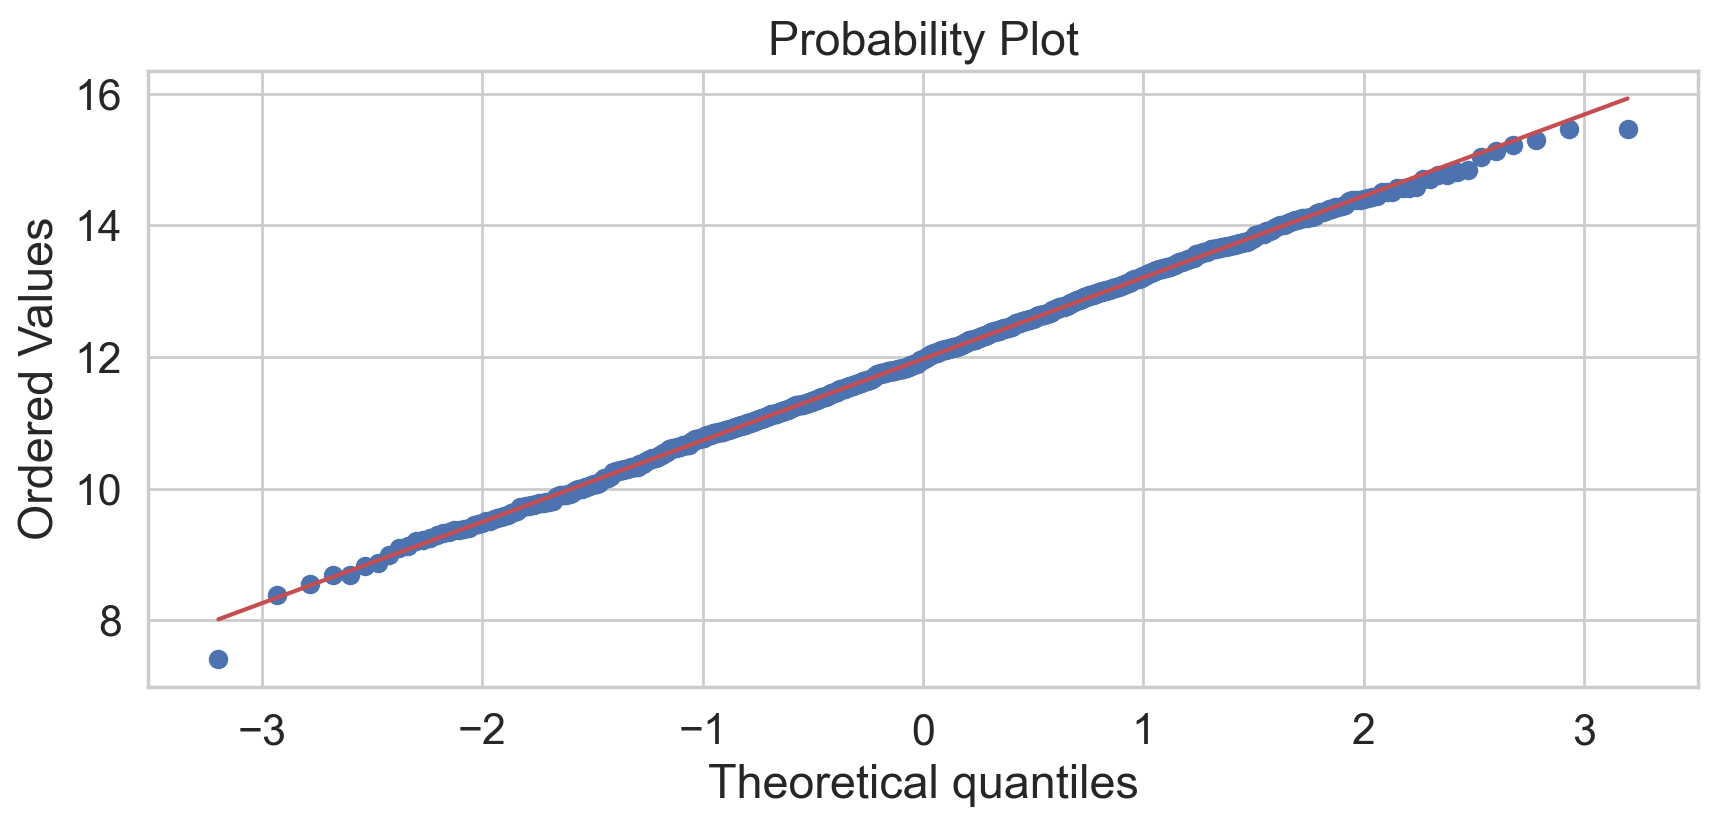

In [11]:
import numpy as np 
import pylab 
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
stats.probplot(Y, dist="norm", plot=pylab)
pylab.show()

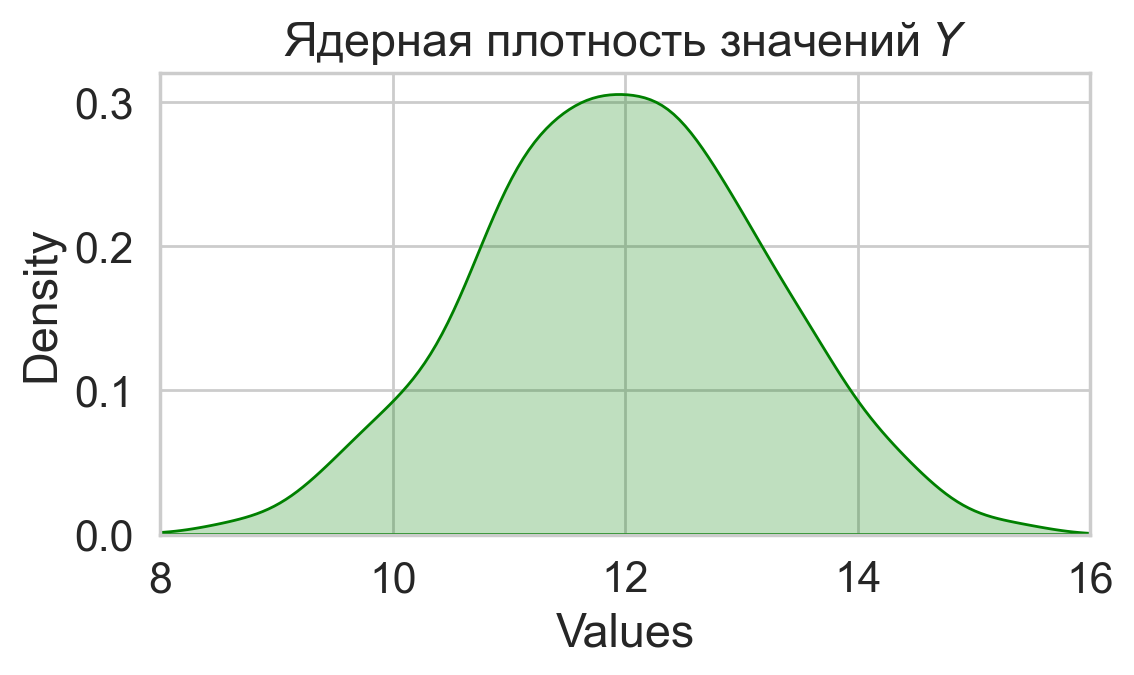

In [12]:
plt.figure(figsize=(6,3))
sns.kdeplot(Y, fill=True, color='green')
plt.xlim(8, 16)
plt.title("Ядерная плотность значений $Y$")
plt.xlabel("Values")
plt.ylabel("Density")
plt.show()

Видим, что ошибка и правда из нормального распределения (во всяком случае, считать, что она такова, мы теперь можем смело).

**Промежуточный вывод:**

#### 3. Найдите оценку параметров

Укажите, чему равна матрица (Z в терминах методички) в задаче:

Как указано выше, 
$$
Z =
\begin{pmatrix}
1 & 0\\
1 & 1\\
1 & 2\\
\vdots & \vdots\\
1 & n-1
\end{pmatrix}
$$

In [13]:
n = X.shape[0]
Z = np.ones((n, 2))
for i in range(n):
    Z[i][1] = i

Z

array([[  1.,   0.],
       [  1.,   1.],
       [  1.,   2.],
       ...,
       [  1., 997.],
       [  1., 998.],
       [  1., 999.]])

$$
V =
\begin{pmatrix}
1 & 0 &\ldots & 0\\
0 & 2 &\ldots & 0\\
\vdots&\vdots & \ddots & \vdots\\
0 & 0 &\ldots & n
\end{pmatrix}
$$

In [14]:
V = np.zeros((n, n))
for i in range(n):
    V[i][i] = (i+1)

V

array([[   1.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    2.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    3., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ...,  998.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,  999.,    0.],
       [   0.,    0.,    0., ...,    0.,    0., 1000.]])

И найдите параметры $\beta_1$, $\beta_2$
\
\
$\hat{\theta} = (\tild{Z}^T\tild{Z})^{-1}\tild{Z}^T\tild{X} = (Z^TV^{-1}Z)^{-1}Z^TV^{-1}X$

In [15]:
from IPython.core.display import Latex
from numpy.linalg import inv
theta_hat = inv(Z.T @ inv(V) @ Z) @ Z.T @ inv(V) @ X

display(Latex('$\\beta_1 = %.4f$' % theta_hat[0]))
display(Latex('$\\beta_2 = %.4f$' % theta_hat[1]))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Проверьте, насколько точна модель при помощи подсчёта ошибок. Выведите сами ошибки на график и проанализируйте его.

Теперь уже можем найти $\eps_i = Y_{i-1} - \beta_2,\ i = 1, \ldots, n-1$
А $\eps_0 = X_0 - \beta_1$ 

In [16]:
epss = np.zeros(n)
epss[0] = X[0] - theta_hat[0]
for i in range(1, n-1):
    epss[i] = Y[i-1] - theta_hat[1]

epss

array([-3.61670289e+00, -1.16778410e-01,  9.31221590e-01,  1.80022159e+00,
        3.05421590e-01,  1.73182159e+00, -8.51378410e-01,  1.10352159e+00,
       -2.46078410e-01,  6.39021590e-01, -2.27878410e-01, -8.91578410e-01,
       -8.98578410e-01, -2.82717841e+00,  2.45992159e+00, -1.51897841e+00,
        1.68692159e+00,  6.26215896e-02,  1.36522159e+00, -1.10027841e+00,
        9.32821590e-01, -8.92078410e-01, -1.95137841e+00,  4.45215896e-02,
       -1.76367841e+00,  4.71921590e-01,  1.03421590e-01, -1.19267841e+00,
        4.98421590e-01, -6.59078410e-01, -3.60978410e-01,  4.98521590e-01,
        1.06902159e+00,  3.66421590e-01, -1.10557841e+00, -1.30427841e+00,
        1.17552159e+00,  1.84162159e+00,  7.69421590e-01,  2.62642159e+00,
        1.54221590e-01,  2.29522159e+00,  1.23282159e+00,  6.95821590e-01,
       -1.34078410e-01, -9.83278410e-01,  9.63221590e-01, -2.44087841e+00,
        8.87215896e-02,  6.71215896e-02, -4.04878410e-01,  7.94121590e-01,
        1.38292159e+00,  

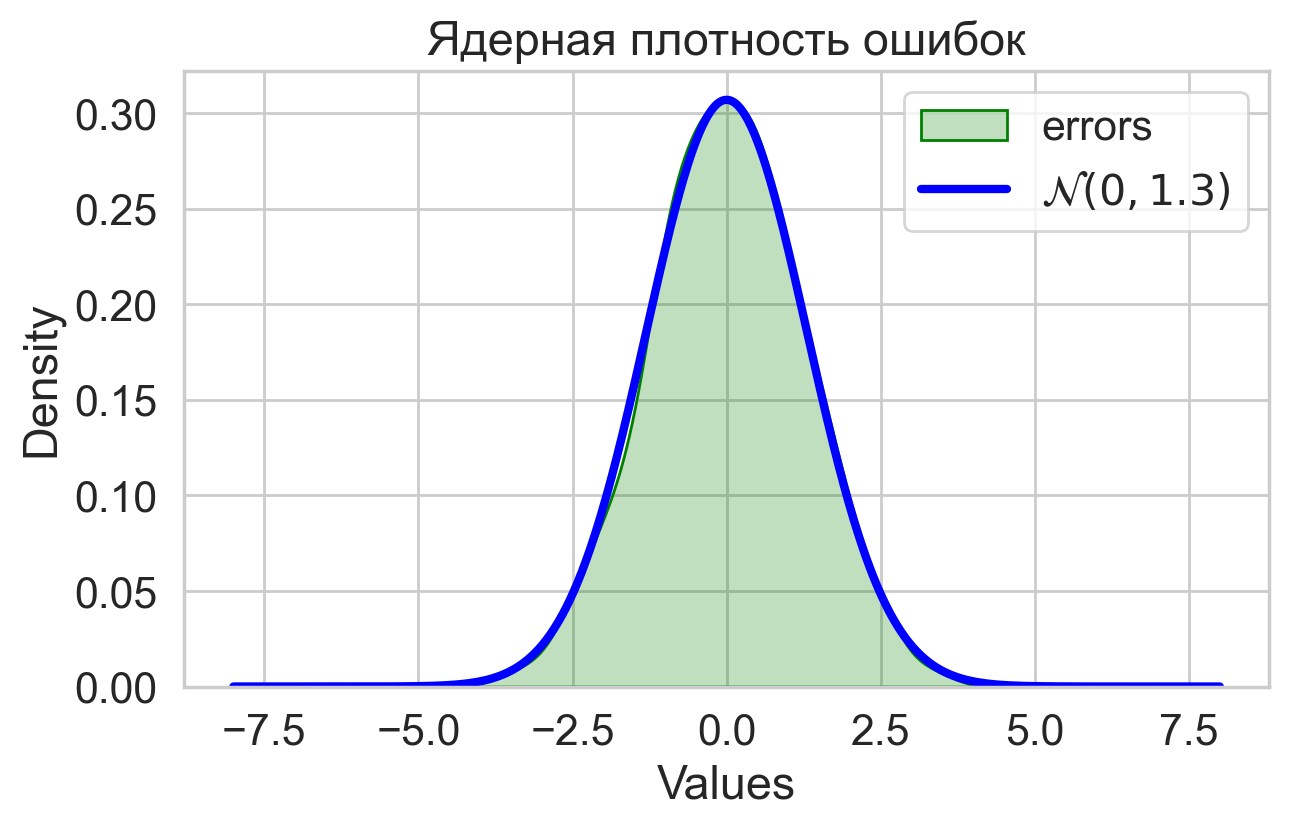

In [17]:
plt.figure(figsize=(7,4))
sns.kdeplot(epss, fill=True, color='green', label='errors')
plt.title("Ядерная плотность ошибок")
plt.xlabel("Values")
plt.ylabel("Density")

grid = np.linspace(-8, 8, 1000)
loc = 0
scale = 1.3
plt.plot(grid, sps.norm.pdf(grid, loc=0, scale=scale),  linewidth=3, color='blue', label='$\mathcal{N}(%.0f,%.1f)$' %(loc, scale))
plt.legend()
plt.show()

Видим, что построенная модель отлично соотносится с требованием, что ошибки распределены как $\mathcal{N}(0, \sigma^2)$

(График я закрасил fill=True просто для наглядности, чтобы кривые не перекрывались)

Бонусная часть (+5 баллов):

Возможно измерения в задаче содержат разные аномалии, что плохо скажется на оценке наименьших квадратов. Попробуйте применить знания из предыдущей домашки о робастных оценках и построить оценку с BP выше нуля. Такие методы называются "робастной регрессией", но определение M-оценки в них то же, что и в обычной робастной статистике.

Функция для усечения выборки по данному квантилю

In [18]:
def truncated(sample, alpha=0.3):
  sorted_sample = sorted(sample)
  size = len(sorted_sample)
  trunc_sample = sorted_sample[int(alpha * size) : int((1 - alpha) * size)]
  return trunc_sample

Функция для усечения ошибок по данному квантилю

In [19]:
def sliced(errs, alpha=0.3):
  sorted_errs = sorted(errs)
  size = len(sorted_errs)
  trunc_errs = sorted_errs[0 : int((1 - alpha) * size)]
  return trunc_errs

Мы же ищем экстремум $F(\theta) = \norm{\tild{X} - \tild{Z}\hat{\theta}}^2$. Имея оценку $\hat{\theta}$, оценим компоненты вектора $\tild{X} - \tild{Z}\hat{\theta}$, и те из них, которые вылезут за пороговое (установленное нами) значение $-$ выкинем, тем самым выкинем из выборки "аномалии". 

$$\tild{X} - \tild{Z}\hat{\theta} = V^{-\frac{1}{2}}\lr{X - Z\hat{\theta}}$$

In [20]:
from numpy.linalg import norm
abs_err = abs(np.sqrt(inv(V)) @ (X - Z @ theta_hat))
display(Latex('$\left|\\tilde{\\tilde{\\varepsilon}}\\right|^2 = %.4f$' % norm(abs_err)))
display(Latex('$\left|\\tilde{\\tilde{\\varepsilon}}_{sliced}\\right|^2 = %.4f$' % norm(sliced(abs_err))))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### 4. Оцените дисперсию ошибки показаний датчика.

Найдите оценку дисперсии $\sigma^2$ показаний датчика $\varepsilon$ (ошибки регрессионной модели). После того, как она найдена, найдите оценку дисперсии $\sigma^2$ ошибки отсчёта времени $\varepsilon^t$ (исходной ошибки).

У регрессионной модели несмещённая оценка параметра $\sigma^2$ есть $\hat{\sigma^2} = \dfrac{1}{n-k}\norm{\tild{X} - \tild{Z}\hat{\theta}}^2 = \dfrac{1}{n-2}\norm{\tild{X} - \tild{Z}\hat{\theta}}^2 = \dfrac{1}{n-2}\norm{V^{-\frac{1}{2}}X - V^{-\frac{1}{2}}Z\hat{\theta}}^2 = \dfrac{1}{n-2}\norm{V^{-\frac{1}{2}}\lr{X - Z\hat{\theta}}}^2$

In [21]:
from numpy.linalg import norm
sigma_hat = norm(np.sqrt(inv(V)) @ (X - Z @ theta_hat)) ** 2 / (n - 2)
display(Latex('$\\widehat{\sigma^2} = %.4f $' % sigma_hat))

<IPython.core.display.Latex object>

#### 5. Измерьте качество модели

В качестве метрики качества модели, эксперты предложили использовать [коэффициент детерминанции](https://ru.wikipedia.org/wiki/Коэффициент_детерминации). Он показывает какую долю дисперсии выборки объясняет линейная регрессия. В нашем случае, значение $R^2 > 0.98$ будет означать, что трамвай прошел испытание.

Изучите что такое коэффициент детерминации и сделайте выводы о том, почему большой коэффициент говорит о высоком качестве модели

Ответ: 
1. Во-первых, $SS_{res} \to 0 \iff R^2 \to 1$, ведь $SS_{tot}$ фиксирована значениями $X_i$ и не зависит от оценки $\hat{\theta}$
2. $SS_{res} = \norm{\tild{\tild{\eps}}}^2$, чем $SS_{res}$ меньше, тем точнее оценка согласуется с данными (тем меньше разница между линейной моделью и данными)
тут хороший график с объяснением в начале, не хочу его сюда дублировать
https://en.wikipedia.org/wiki/Coefficient_of_determination  

$$SS_{res} = \norm{\tild{\tild{\eps}}}^2 = \norm{\tild{X} - \tild{Z}\hat{\theta}}^2 = \norm{V^{-\frac{1}{2}}\lr{X - Z\hat{\theta}}}^2 , \hspace{0.7cm} SS_{tot} = ||\tild{X} - \tild{X}_{mean}||^2, \text{ где } \tild{X}_{mean} = \dfrac{1}{n}\sum_{i=0}^{n-1} \tild{X}_i$$
$$R^2 = 1 - \dfrac{SS_{res}}{SS_{tot}}$$

In [22]:
SS_res = norm(np.sqrt(inv(V)) @ (X - Z @ theta_hat)) ** 2
X_tild = np.sqrt(inv(V)) @ X
SS_tot = norm(X_tild - np.mean(X_tild)) ** 2
R_squared = 1 - SS_res / SS_tot
display(Latex('$R^2 = %.6f$' % R_squared))

<IPython.core.display.Latex object>

Видим, что $R^2 > 0.98\ $ испытание пройдено

Как альтернатива коэффициенту детерминации есть коэффициенты AIC (https://en.wikipedia.org/wiki/Akaike_information_criterion) и BIC (https://en.wikipedia.org/wiki/Bayesian_information_criterion). Найдите их и проинтерпретируйте их значения.

\textbf{Gaussian special case}
Under the assumption that the model errors or disturbances are independent and identically distributed according to a normal distribution

AIC $ = 2k - 2\ln(\hat{L}) =  n\ln\lr{\frac{SS_{res}}{n}} + 2k$

BIC $ = k\ln(n) - 2\ln(\hat{L}) = \ln\lr{\frac{SS_{res}}{n}} + k\ln(n)$

В нашем случае $k = 2$

In [23]:
k = 2
AIC = n * np.log(SS_res / n) + 2 * k
BIC = n * np.log(SS_res / n) + k * np.log(n)
print("BIC:\t", BIC)
print("AIC:\t", AIC)

BIC:	 -1360.658793541785
AIC:	 -1370.4743040997491


Из статьи https://en.wikipedia.org/wiki/Akaike_information_criterion заключаем, что с моделью всё хорошо: чем меньше значение BIC (AIC), тем меньше $SS_{res} \implies$ модель точнее 

## Задача 2 (5 баллов)

Непараметрическая регрессия и метод Надарая-Ватсона.

Иногда вытаскивать информативные признаки из данных сложно, а регрессию делать хочется. Тогда можно построить нечто похожее на ядерную оценку плотности, но для регрессионной задачи. Она основана на вычислении значения в новой точке по значениям в соседних точках (похожее Вы видели на курсе машинного обучения, но для классификации и без статистики).

Изучите формулу Надарая-Ватсона из статьи на википедии: https://en.wikipedia.org/wiki/Kernel_regression

1) Сгенерируйте выборку для линейной регрессии руками (использовать реальные данные может быть нецелесообразно из-за проблем с визуализацией результата и проклятия размерностей).

Пусть в модели будет одна фича x и по ней вычисляется отклик y = ax + b + $\eps$, где ошибка независима и нормальна, а параметры выберите сами.

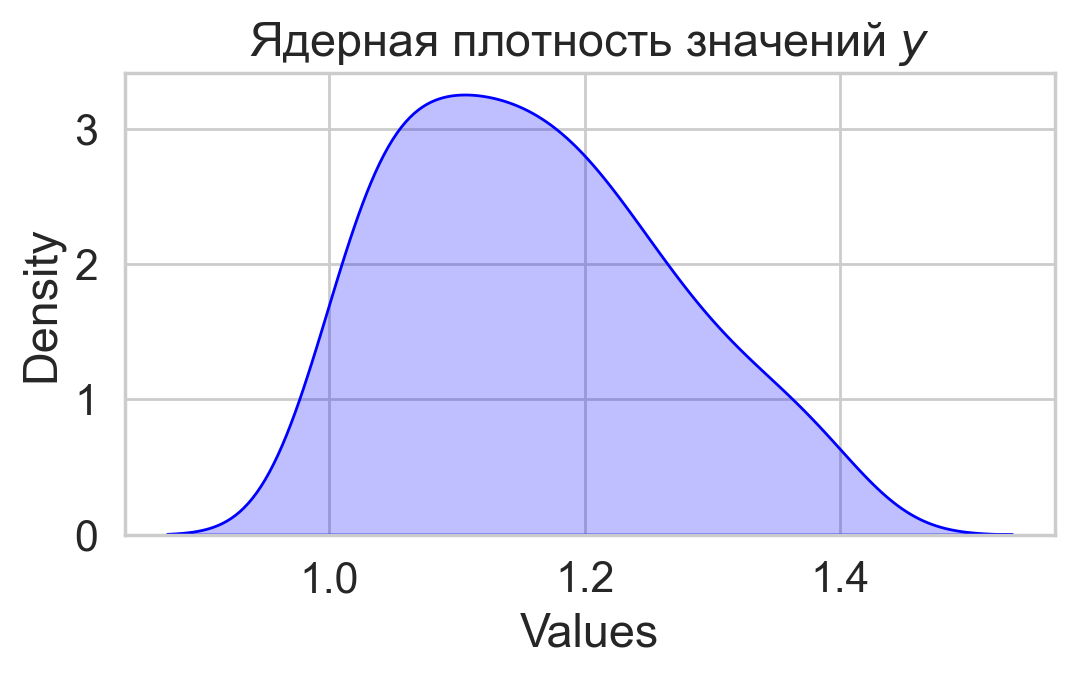

In [24]:
x = np.linspace(0, 1, 100)
a = 0.3
b = 1
e = sps.norm.pdf(np.linspace(-1, 1, 100), loc=2, scale=0.5)
y = a * x + b + e
plt.figure(figsize=(6,3))
sns.kdeplot(y, fill=True, color='blue')
plt.title("Ядерная плотность значений $y$")
plt.xlabel("Values")
plt.ylabel("Density")
plt.show()

Сгенерируйте тестовую выборку тем же способом и посчитайте отклик из формулы Надарая-Ватсона для хотя бы трёх разных ядер (примеры ядер: https://en.wikipedia.org/wiki/Kernel_(statistics)). Сравните ошибки.

In [25]:
def Triangular_Kernel(u):
    # Support: |u| <= 1
    return 1 - abs(u)

def Epanechnikov_Kernel(u):
    # Support: |u| <= 1
    return 3 * (1 - u**2) / 4

def Quartic_Kernel(u):
    # Support: |u| <= 1
    return 15 * (1 - u**2)**2 / 16

def Tricube_Kernel(u):
    # Support: |u| <= 1
    return 70 * (1 - abs(u**3))**3 / 81


def Nadaraya_Watson(K, h, points, x, y):
    n = len(points)
    y_est = np.zeros(n)
    for i in range(n):
        denominator = K((x - points[i]) / h) / h
        numerator = np.dot(denominator, y)
        y_est[i] = np.sum(numerator) / np.sum(denominator)
    return y_est

In [26]:
x_test = np.linspace(0, 10, 100)
e_test = sps.norm.pdf(np.linspace(-1, 1, 100), loc=2, scale=0.5)
y_test = a * x_test + b + e_test

import pandas

NW = pd.DataFrame()
NW['Triangular_Kernel'] = Nadaraya_Watson(Triangular_Kernel, h=2, points=x_test, x=x, y=y)
NW['Epanechnikov_Kernel'] = Nadaraya_Watson(Epanechnikov_Kernel, h=2, points=x_test, x=x, y=y)
NW['Tricube_Kernel'] = Nadaraya_Watson(Tricube_Kernel, h=2, points=x_test, x=x, y=y)
NW['y_test'] = y_test
NW

,Triangular_Kernel,Epanechnikov_Kernel,Tricube_Kernel,y_test
0,1.141569,1.153231,1.150916,1.000000
1,1.143781,1.155071,1.154146,1.030303
2,1.147161,1.156798,1.156705,1.060606
3,1.151329,1.158445,1.158706,1.090909
4,1.156009,1.160041,1.160303,1.121212
...,...,...,...,...
95,1.157530,1.154815,1.132488,3.955932
96,1.157590,1.154899,1.132803,3.993207
97,1.157649,1.154981,1.133111,4.030962
98,1.157705,1.155062,1.133412,4.069215


In [27]:
ERRORS = NW.drop(columns='y_test')
ERRORS['Triangular_Kernel'] -= y_test
ERRORS['Epanechnikov_Kernel'] -= y_test
ERRORS['Tricube_Kernel'] -= y_test
ERRORS

,Triangular_Kernel,Epanechnikov_Kernel,Tricube_Kernel
0,0.141569,0.153231,0.150916
1,0.113477,0.124768,0.123843
2,0.086555,0.096192,0.096098
3,0.060419,0.067536,0.067797
4,0.034797,0.038829,0.039091
...,...,...,...
95,-2.798402,-2.801116,-2.823443
96,-2.835617,-2.838307,-2.860404
97,-2.873314,-2.875981,-2.897851
98,-2.911510,-2.914154,-2.935803


Визуализируйте Ваши предсказания (постройте кривую предсказаний по сетке x с шагом 0.01)

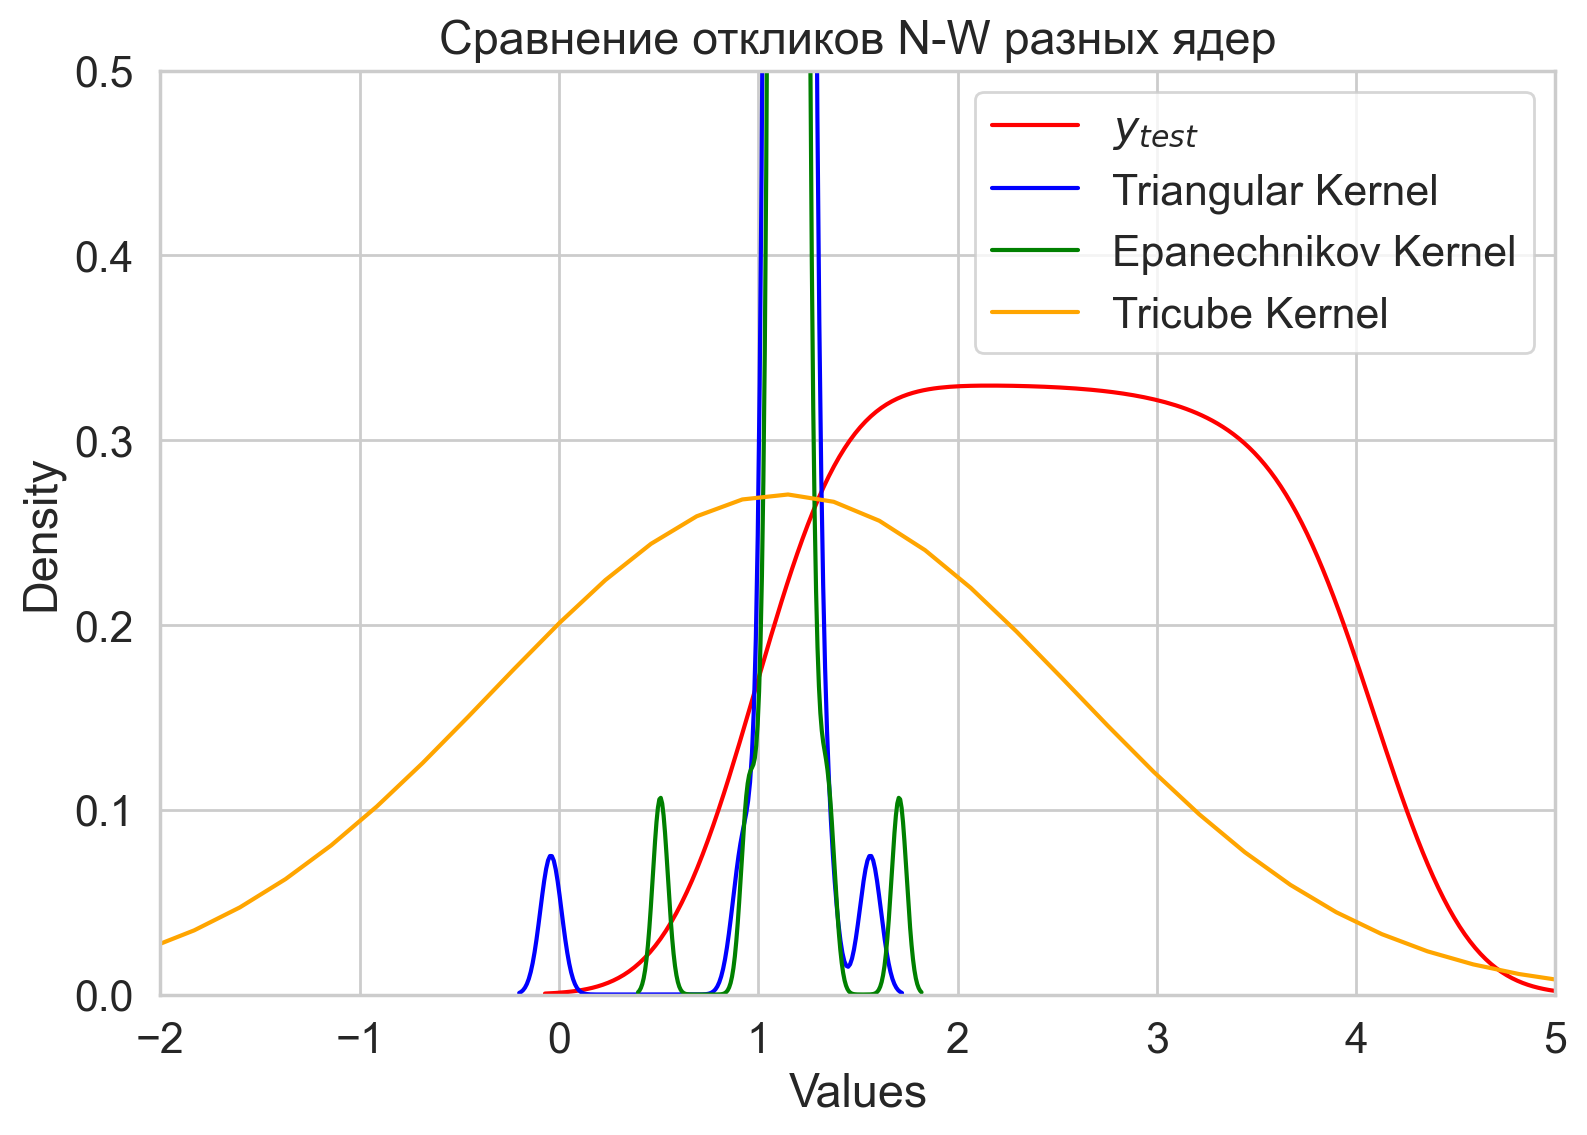

In [28]:
plt.figure(figsize=(9, 6))
sns.kdeplot(y_test, color='red', label='$y_{test}$')
sns.kdeplot(NW['Triangular_Kernel'], color='blue', label='Triangular Kernel')
sns.kdeplot(NW['Epanechnikov_Kernel'], color='green', label='Epanechnikov Kernel')
sns.kdeplot(NW['Tricube_Kernel'], color='orange', label='Tricube Kernel')
plt.xlim(-2, 5)
plt.ylim(0, 0.5)
plt.title("Сравнение откликов N-W разных ядер")
plt.xlabel("Values")
plt.ylabel("Density")
plt.legend()
plt.show()

Видим, что лучшее предсказание с ядерной функцией Tricube Kernel

Заметим, что мы нигде не оценивали сами параметры, но смогли решить финальную задачу -- предсказывать y по x.

А теперь поймём что для этого не нужна линейность.

Проделайте рассуждения выше для нелинейных зависимостей ($y = sin(kx), y = log(x), y = x^k$. Постройте графики предсказаний и сравните их с истинными функциями.

In [29]:
def make_plot(func, _h=1, xmin=-3, xmax=3, ymax=0.5):
    _x = np.linspace(0, 1, 100)
    _e = sps.norm.pdf(np.linspace(-1, 1, 100), loc=2, scale=0.5)
    _y = func(_x)
    
    _x_test = np.linspace(0, 10, 100)
    _e_test = sps.norm.pdf(np.linspace(-1, 1, 100), loc=2, scale=0.5)
    _y_test = func(_x_test)
    
    
    _NW = pd.DataFrame()
    _NW['Triangular_Kernel'] = Nadaraya_Watson(Triangular_Kernel, h=_h, points=_x_test, x=_x, y=_y)
    _NW['Epanechnikov_Kernel'] = Nadaraya_Watson(Epanechnikov_Kernel, h=_h, points=_x_test, x=_x, y=_y)
    _NW['Tricube_Kernel'] = Nadaraya_Watson(Tricube_Kernel, h=_h, points=_x_test, x=_x, y=_y)
    
    plt.figure(figsize=(9, 6))
    sns.kdeplot(y_test, color='red', label='$y_{test}$')
    sns.kdeplot(_NW['Triangular_Kernel'], color='blue', label='Triangular Kernel')
    sns.kdeplot(_NW['Epanechnikov_Kernel'], color='green', label='Epanechnikov Kernel')
    sns.kdeplot(_NW['Tricube_Kernel'], color='orange', label='Tricube Kernel')
    plt.xlim(xmin, xmax)
    plt.ylim(0, ymax)
    plt.title("Сравнение откликов N-W разных ядер")
    plt.xlabel("Values")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

In [30]:
def f1(x, k=np.pi):
    return np.sin(k*x)

def f2(x):
    return np.log(x)

def f3(x, k=3):
    return x**k

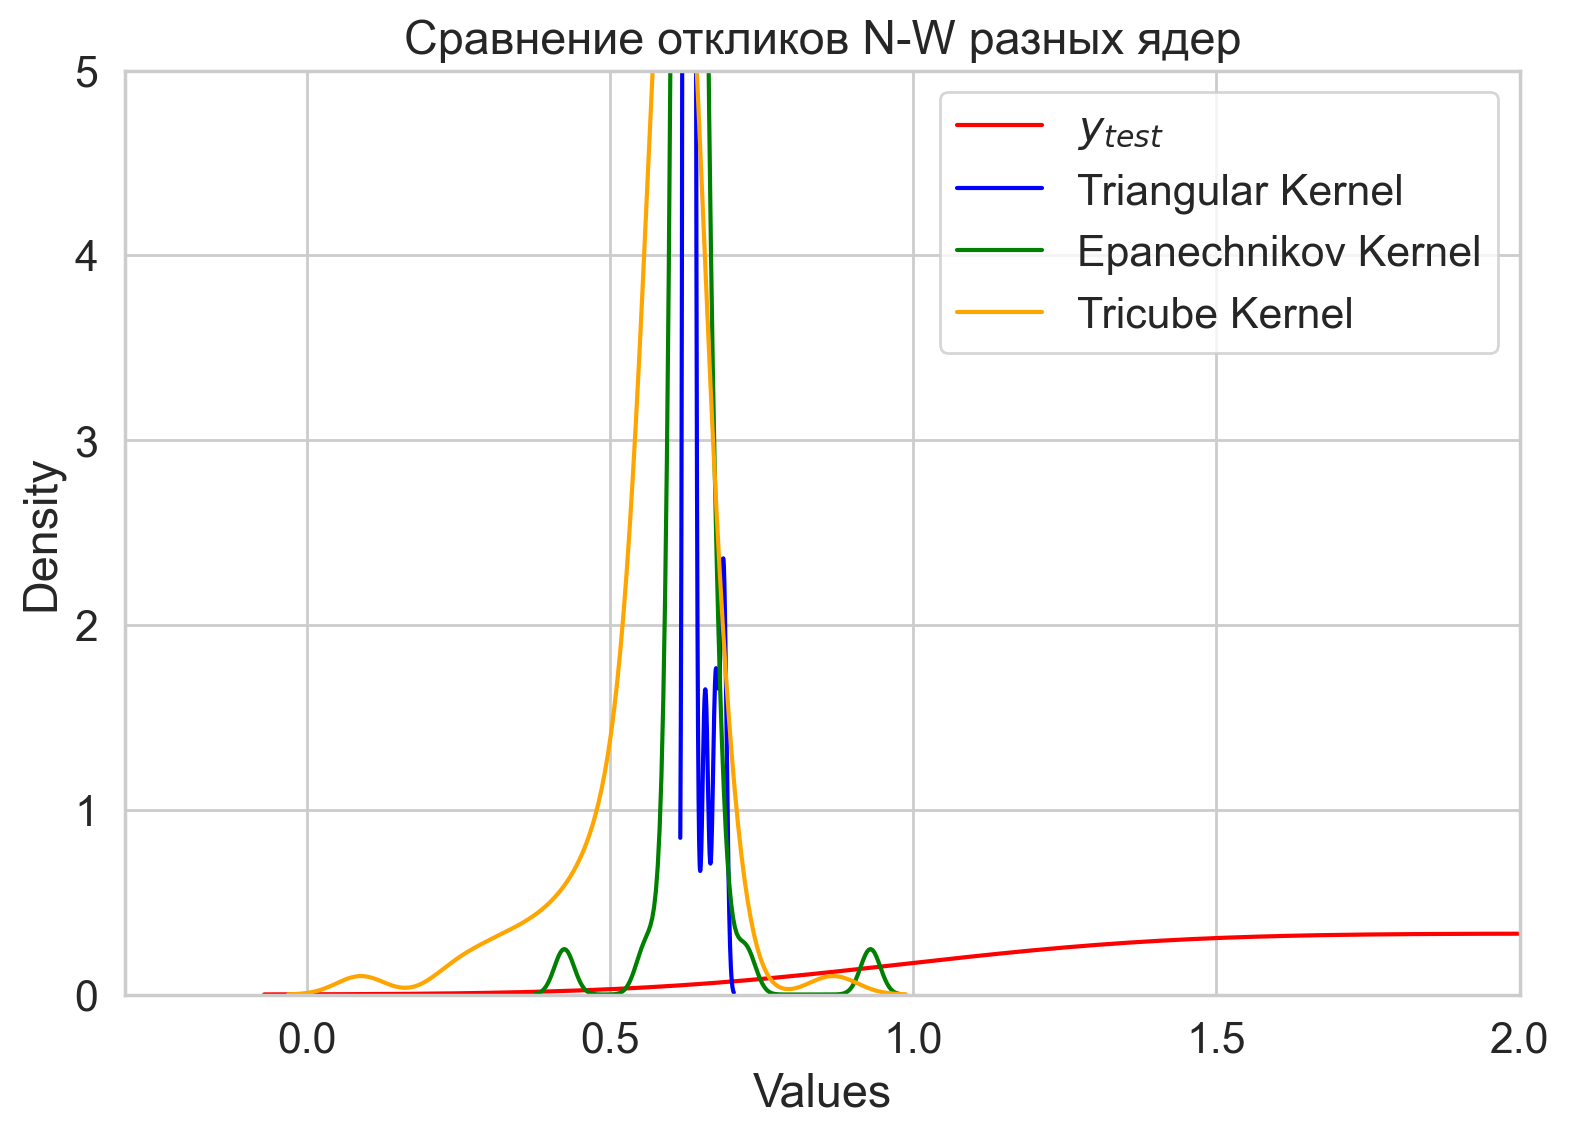

In [31]:
make_plot(f1, _h=1, xmin=-0.3, xmax=2, ymax=5)

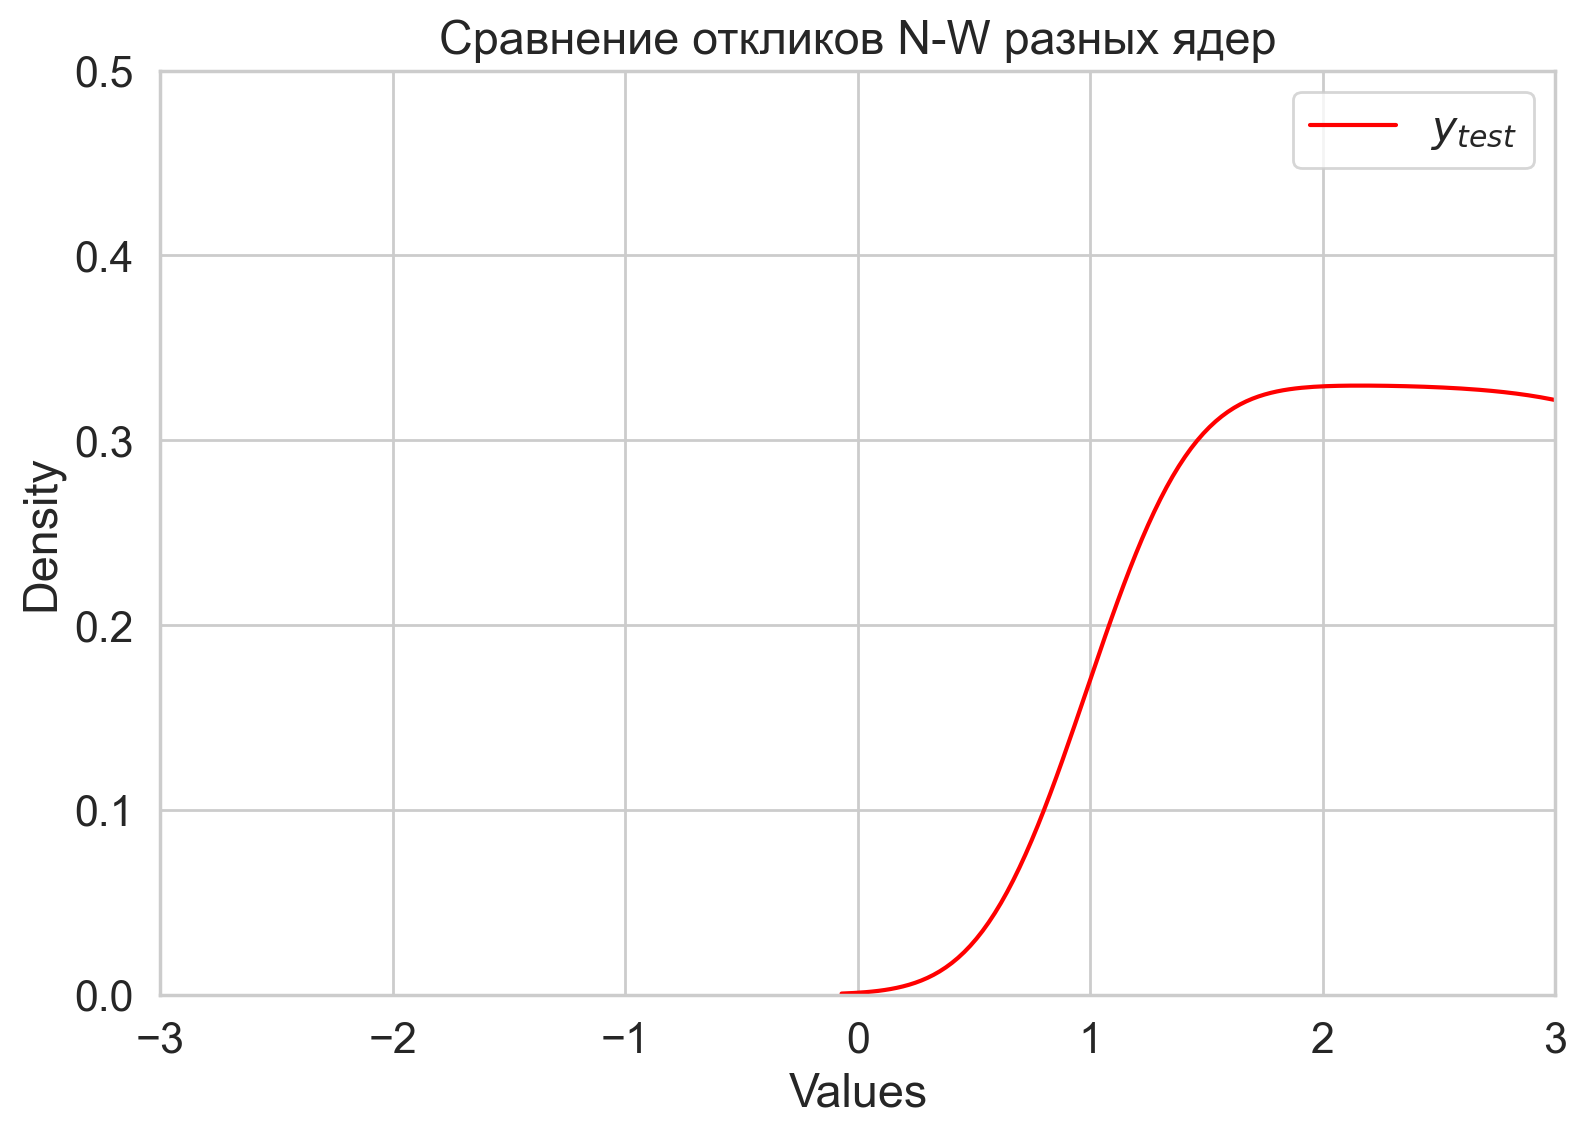

In [32]:
make_plot(f2)

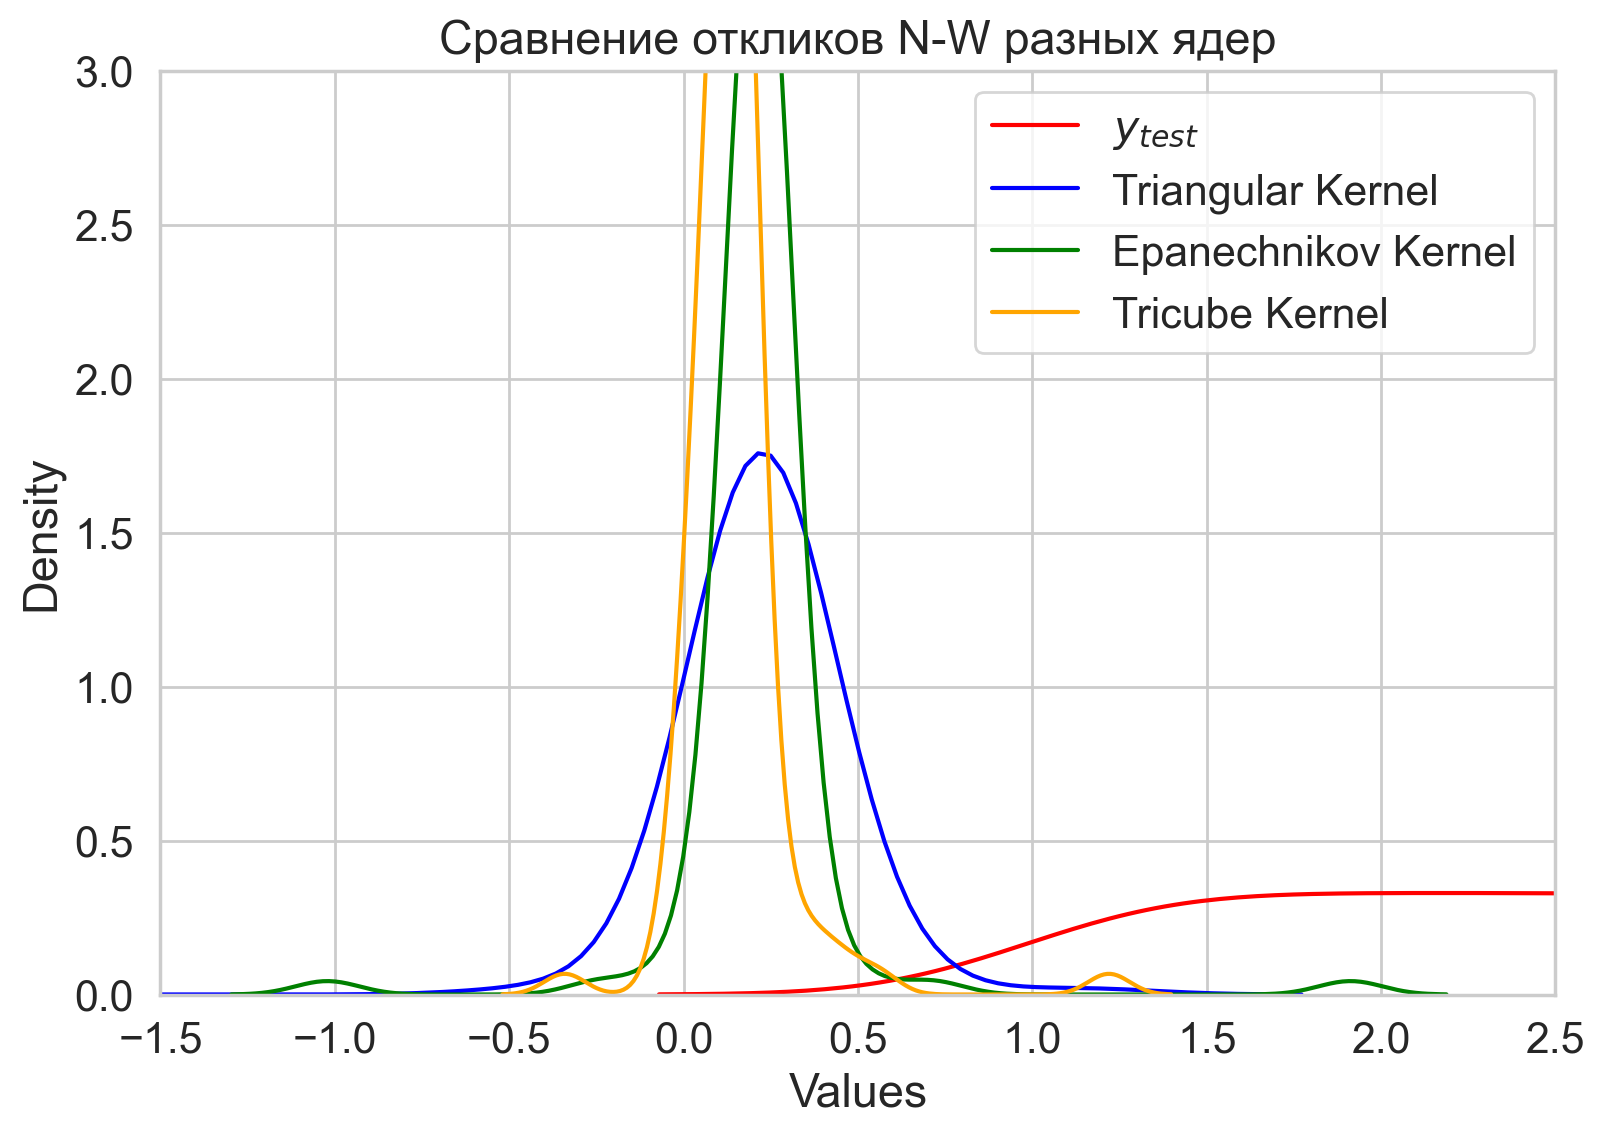

In [33]:
make_plot(f3, xmin=-1.5, xmax=2.5, ymax=3)

**Вывод:**

Для разных целевых функций разные ядра показывают себя лучше.

Можете попробовать применить метод Надарая-Ватсона для выборки из задачи 3 и посмотреть, что получится (0 баллов)

## Задача 3 (15 баллов)

Теперь давайте попрактикуемся в решении задач на реальных данных. Мы будем анализировать рынок недвижимости 🏘. Данные возьмем из [соревнования](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) на платформе kaggle. В отличие от соревнований нас будут интересовать зависимости в данных, а не более точные предсказания.

![](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png).

В частности мы будем смотреть на влияние различных признаков на стоимость дома и проверим несколько гипотез.

In [34]:
from scipy import stats as sps

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [35]:
df = pd.read_csv("train.csv")

df.fillna("NA", inplace=True)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


Можно заметить, что в данных присутствуют категориальные признаки, которые при этом не лишены порядка.

Вспомните курс машинного обучения. Как можно обработать категориальные признаки, чтобы регрессионная модель была осмысленна?

Ответ: Можно просто биективно закодировать категориальные признаки числами (например, от 0 до n), сохранив логический порядок

In [36]:
useful_columns = [
    "OverallQual", 
    "GrLivArea", 
    "ExterQual",
    "KitchenQual",
    "GarageArea",
    "PoolArea",
    "BsmtQual",
    "TotalBsmtSF",
    "GarageFinish",
    "SalePrice"
]

filtered_df = df[useful_columns]
filtered_df

,OverallQual,GrLivArea,ExterQual,KitchenQual,GarageArea,PoolArea,BsmtQual,TotalBsmtSF,GarageFinish,SalePrice
0,7,1710,Gd,Gd,548,0,Gd,856,RFn,208500
1,6,1262,TA,TA,460,0,Gd,1262,RFn,181500
2,7,1786,Gd,Gd,608,0,Gd,920,RFn,223500
3,7,1717,TA,Gd,642,0,TA,756,Unf,140000
4,8,2198,Gd,Gd,836,0,Gd,1145,RFn,250000
...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,TA,TA,460,0,Gd,953,RFn,175000
1456,6,2073,TA,TA,500,0,Gd,1542,Unf,210000
1457,7,2340,Ex,Gd,252,0,TA,1152,RFn,266500
1458,5,1078,TA,Gd,240,0,TA,1078,Unf,142125


Изучим категориальные признаки:

In [37]:
filtered_df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', 'NA', 'Fa'], dtype=object)

https://datascience.stackexchange.com/questions/54750/what-is-the-best-way-to-replace-nan-values-for-ranked-columns

`BsmtQual`: Evaluates the height of the basement
\begin{center}
\begin{tabular}{ |c|c|c|c| } 
 \hline
 5 & Ex & Excellent & (100+ inches) \\ 
 4 & Gd & Good & (90-99 inches) \\ 
 3 & TA & Typical & (80-89 inches) \\ 
 2 & Fa & Fair & (70-79 inches) \\ 
 1 & Po &  Poor & (<70 inches) \\ 
 0 & NA & No\ Basement & (Absent) \\ 
 \hline
\end{tabular}
\end{center}

In [38]:
filtered_df['ExterQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [39]:
filtered_df['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [40]:
filtered_df['BsmtQual'] = filtered_df['BsmtQual'].replace({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'NA' : 0})
filtered_df['ExterQual'] = filtered_df['ExterQual'].replace({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'NA' : 0})
filtered_df['KitchenQual'] = filtered_df['KitchenQual'].replace({'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'NA' : 0})

In [41]:
filtered_df['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', 'NA'], dtype=object)

https://uw-madison-datascience.github.io/high-dim-data-lesson/02-Intro-to-Ames-Housing-Dataset/index.html

`GarageFinish`: Evaluates the garage presence 
\begin{center}
\begin{tabular}{ |c|c|c| } 
 \hline
 3 & Fin & Finished \\ 
 2 & RFn & Rough Finished \\ 
 1 & Unf & Unfinished \\ 
 0 & NA & No\ Garage \\ 
 \hline
\end{tabular}
\end{center}

In [42]:
filtered_df['GarageFinish'] = filtered_df['GarageFinish'].replace({'Fin' : 3, 'RFn' : 2, 'Unf' : 1, 'NA' : 0})

### Визуализируйте данные

Перед тем, как начать использовать линейные модели необходимо убедиться в том, что столбцы признаков не слишком коллинеарны. Для этого можно использовать корреляцию Пирсона. Используя ``sns.heatmap`` постройте "тепловую карту" попарных корреляций признаков. Для того, чтобы увидеть числовые значения корреляций используйте ``annot=True``. Сделайте размер графика алекватным, например, ``figsize=(11, 10)``.

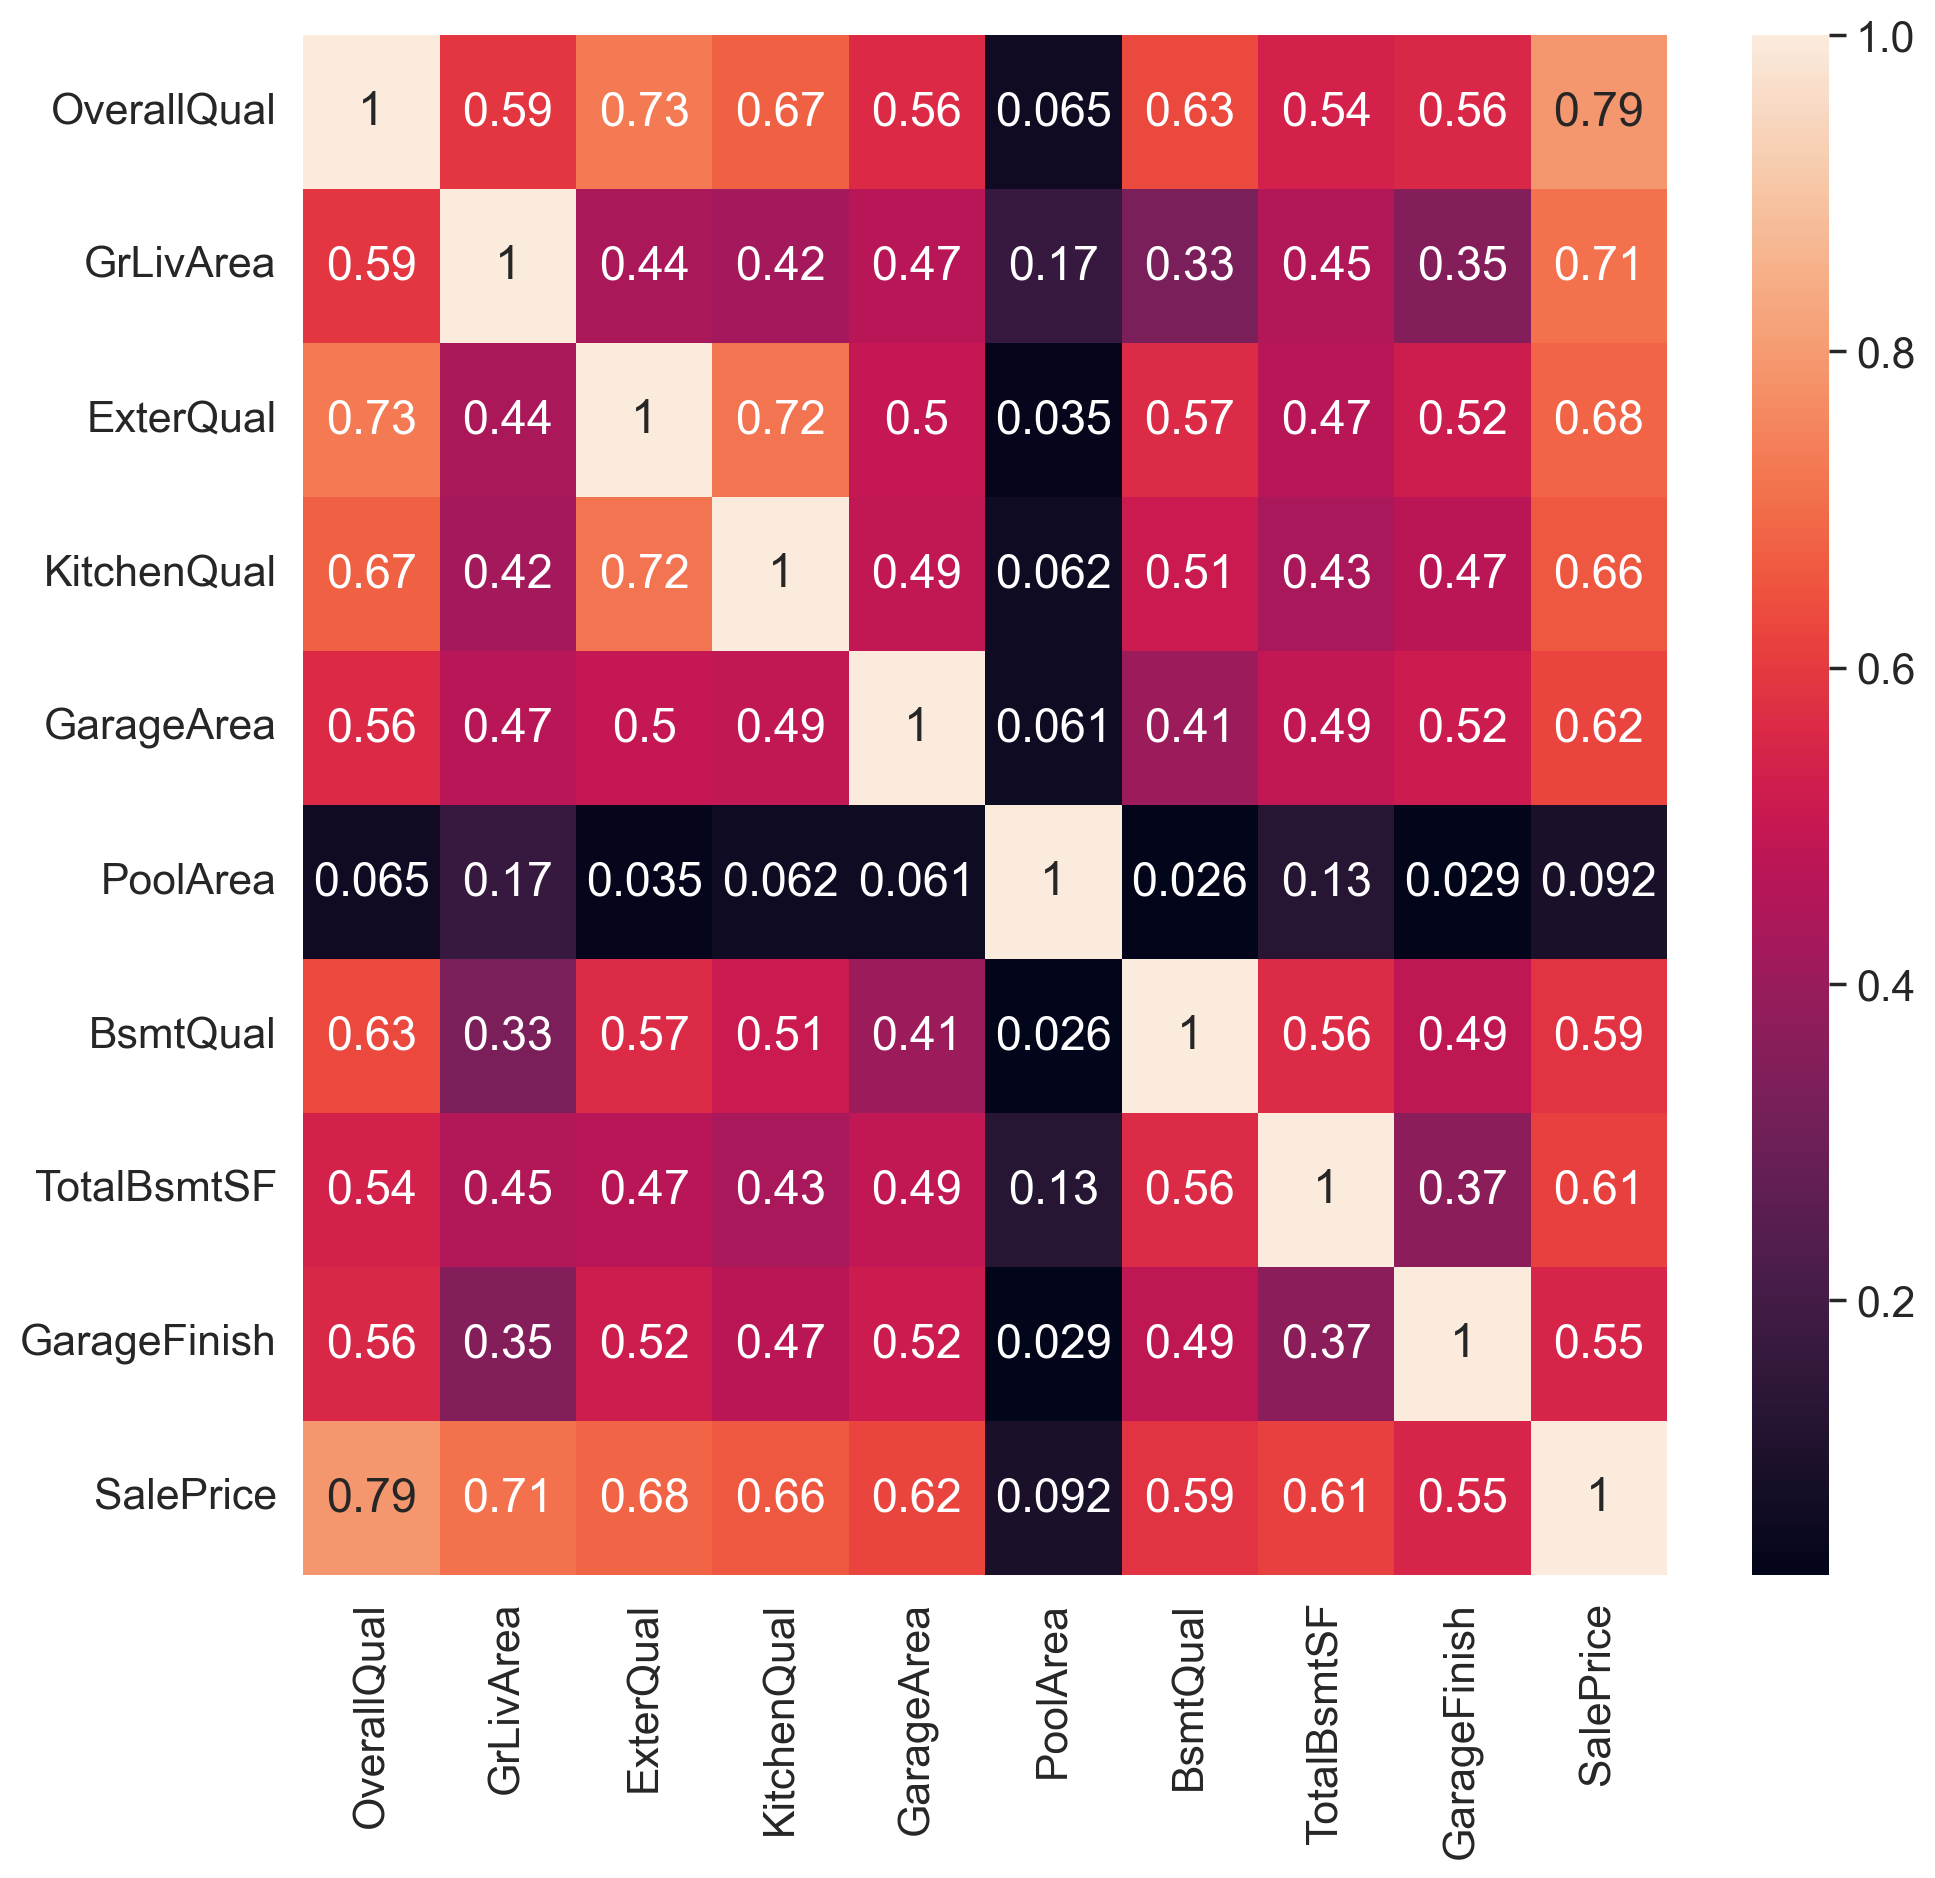

In [43]:
plt.figure(figsize=(11, 10))
sns.heatmap(filtered_df.corr(), annot=True)
plt.show()

Изучите карту и сделайте по ней выводы о зависимости в данных ($|r_{XY}| > 0.9$). А чем плохи зависимые признаки? Для ответа на последний вопрос напишите чему равно аналитическое решение задачи регрессии.

**Ответ:**

Решение задачи регрессии есть $\hat{\theta} = (Z^TZ)^{-1}Z^TX$
Корреляция Пирсона:
$$\rho_{X, Y} = \dfrac{\bb{E}[XY] - \bb{E}[X]\bb{E}[Y]}{\sqrt{\bb{E}[X^2] - \lr{\bb{E}[X]}^2}\sqrt{\bb{E}[Y^2] - \lr{\bb{E}[Y]}^2}}$$
Лемма:
$$\rho_{Y, X} = \pm1 \iff Y = a X + b\ \text{ линейная зависимость }$$
Д-во:

Обозначим $\rho = \rho_{Y, X}$
    
$$
\bb{D}(Y - aX) = \sigma_Y^2 + a^2\sigma_X^2 - 2a\cdot cov\lr{Y, X} = \sigma_Y^2 + a^2\sigma_X^2 - 2a\cdot\rho\sigma_Y\sigma_X = \lr{\sigma_Y^2 - a\rho\sigma_X^2}^2
$$

Теперь возьмём $a = \rho\dfrac{\sigma_Y}{\sigma_X}$ и получим $\bb{D}(Y - aX) = 0 \implies Y - aX = b = const$   (почти наверное)

Импликация в обратную сторону очевидна $\qed$


Осталось заметить, что линейная зависимость столбцов матрицы $Z$ влечёт вырожденность матрицы $Z^TZ$, откуда $(Z^TZ)^{-1}$, вообще говоря, перестаёт быть легальной операцией (при нахождении обратной матрицы мы делим на нуль $-$ определитель вырожденной матрицы) 

Удалите, если требуется, один из двух скоррелированных признаков в ячейке ниже.

У нас не наблюдается корреляции $|r_{XY}| > 0.9$, но давайте удалим наиболее скоррелированные признаки `SalePrice` и `OverallQual` (вполне логично, что цена напрямую зависит от общего качества)

In [44]:
filtered_df = filtered_df.drop(columns='OverallQual')

Давайте подробнее изучим взаимодействие признаков. Построим матрицу. На диагонале $a_{ii} = d_i$ этой матрицы построим гистограммы для $i$-го признака. На остальных позициях $a_{ij}$ будут располагаться scatterplot в осях признака $i$ по $x$ и признака $j$ по $y$. Для этого можно использовать метод из pandas ``pd.plotting.scatter_matrix``.

In [45]:
filtered_df.columns

Index(['GrLivArea', 'ExterQual', 'KitchenQual', 'GarageArea', 'PoolArea',
       'BsmtQual', 'TotalBsmtSF', 'GarageFinish', 'SalePrice'],
      dtype='object')

<Figure size 5500x5500 with 0 Axes>

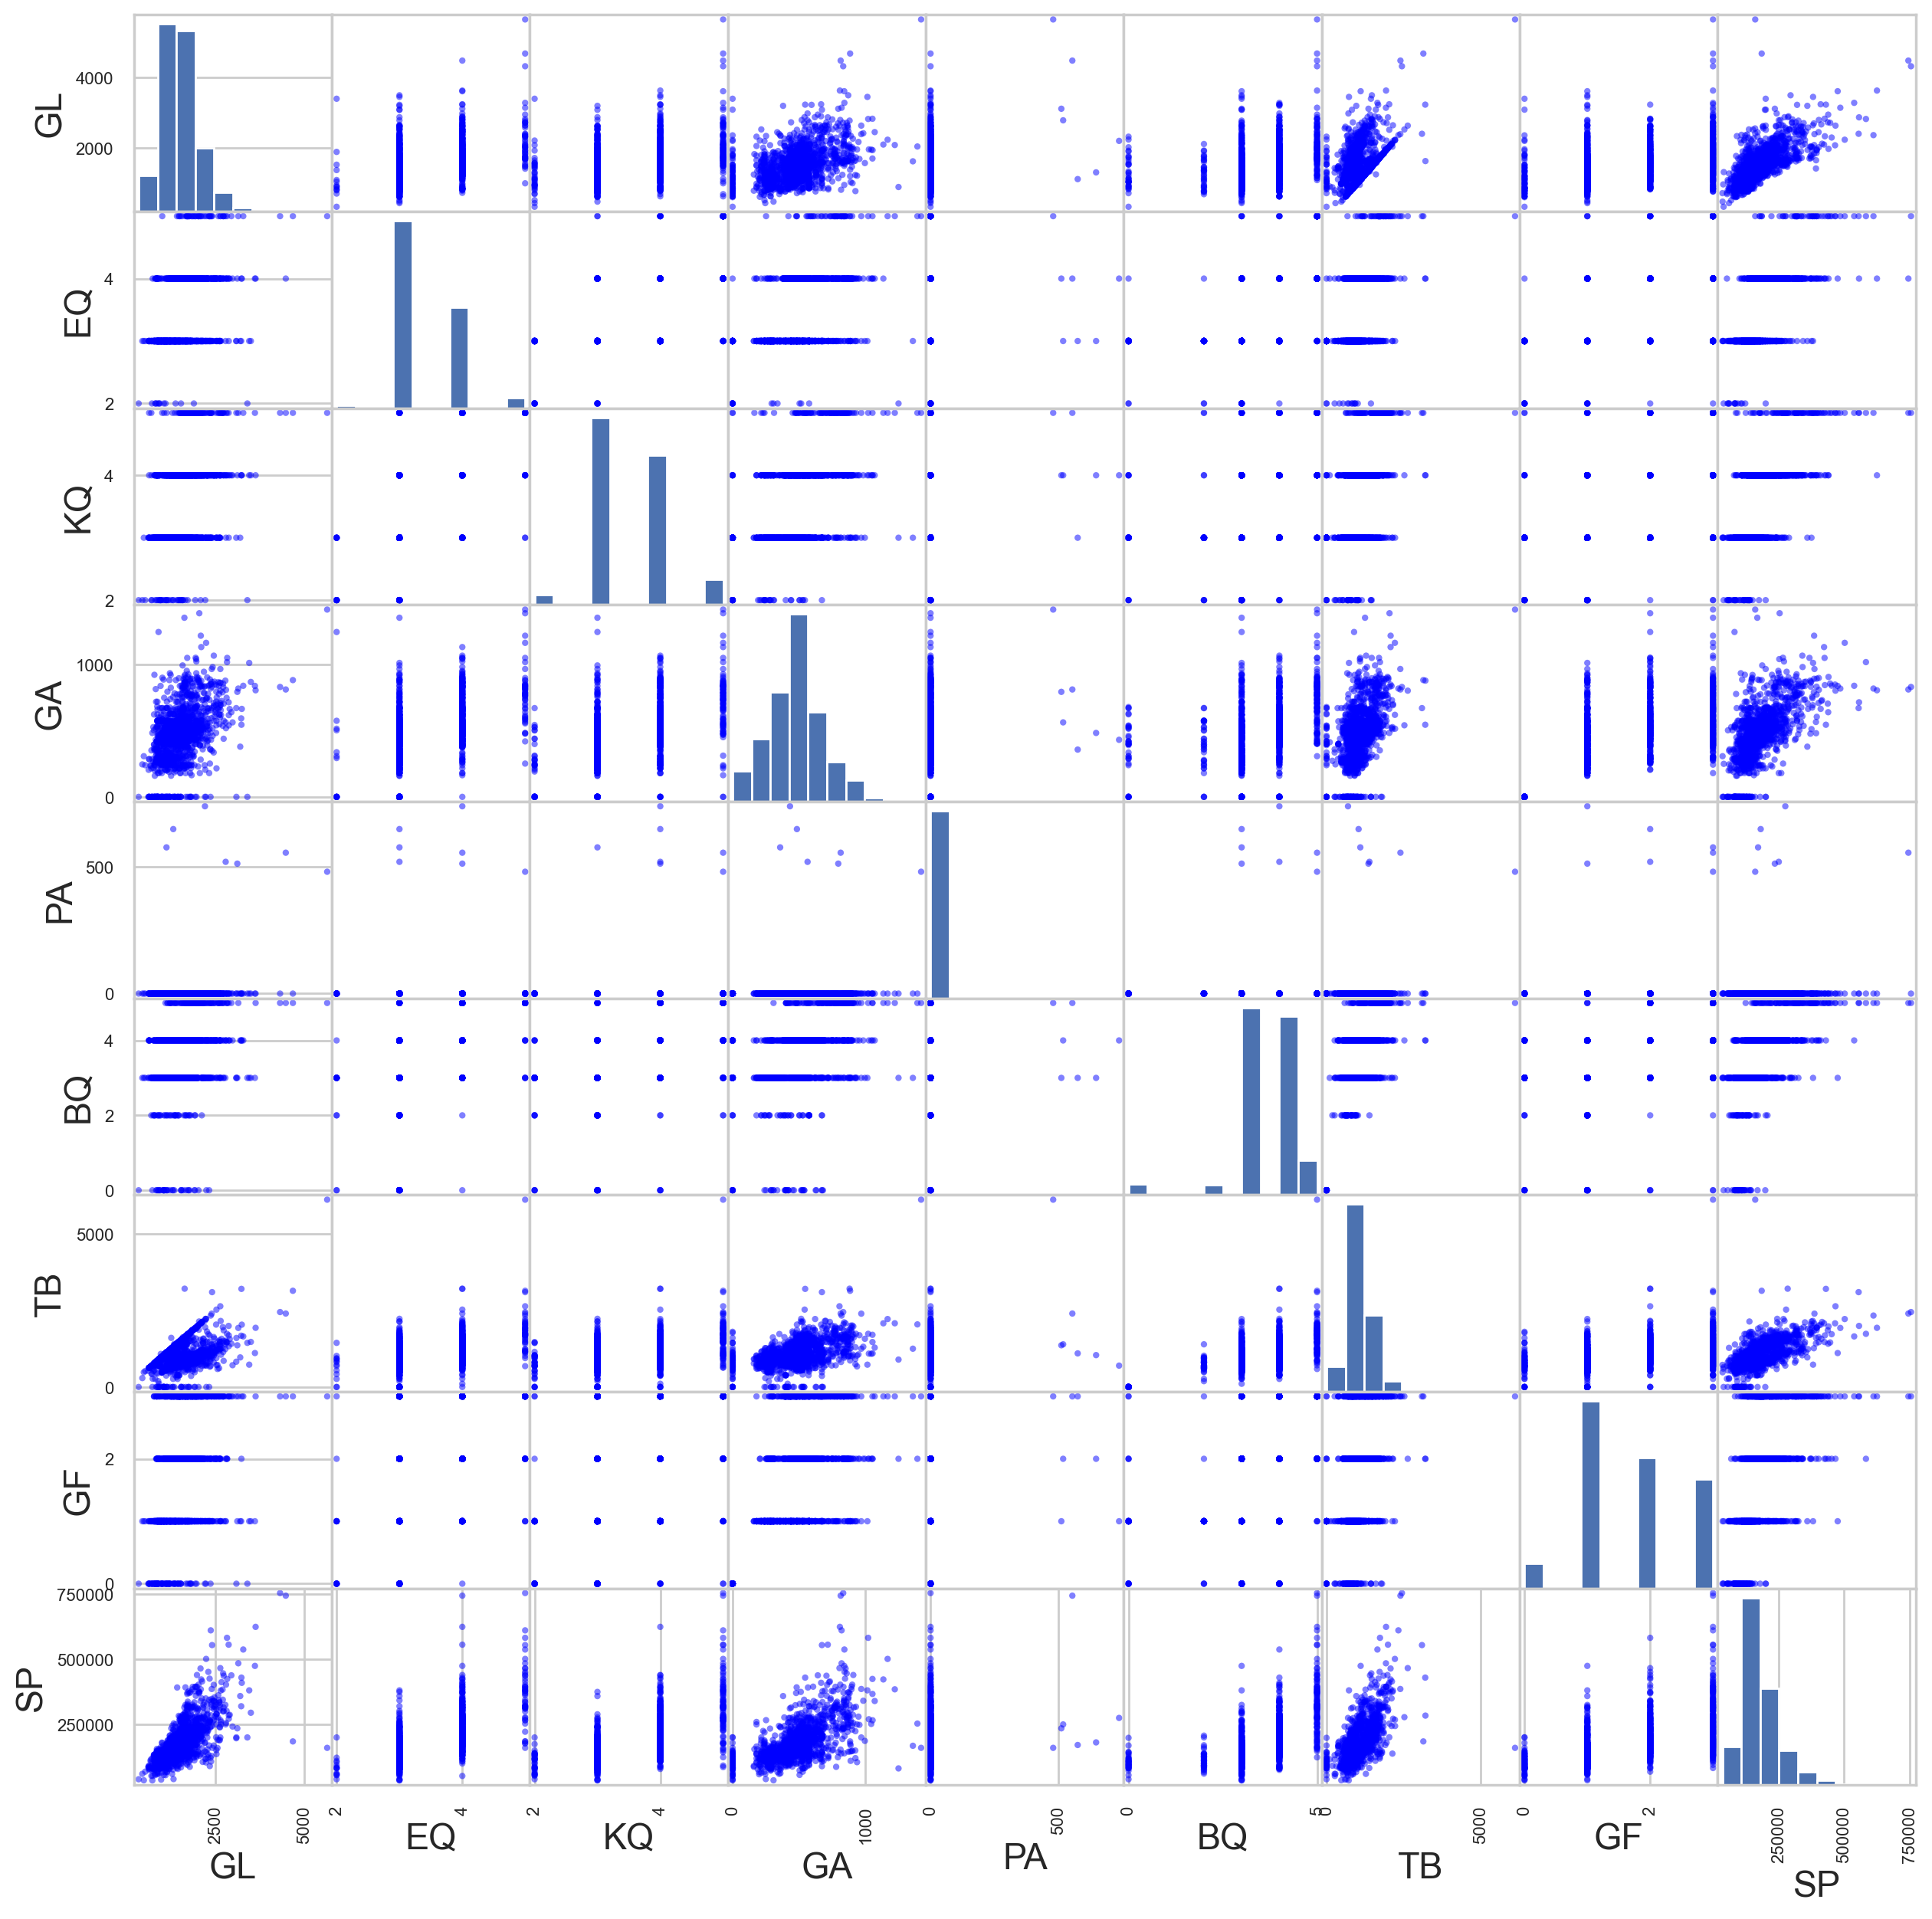

In [46]:
plt.figure(figsize=(55, 55))
pd.plotting.scatter_matrix(filtered_df.rename(columns={
    'GrLivArea' : 'GL',
    'ExterQual' : 'EQ',
    'KitchenQual' : 'KQ',
    'GarageArea' : 'GA',
    'PoolArea' : 'PA',
    'BsmtQual' : 'BQ',
    'TotalBsmtSF' : 'TB',
    'GarageFinish' : 'GF', 
    'SalePrice' : 'SP'
}), color='blue', figsize=(15, 15))
plt.show()

Сделайте вывод о данных. Опишите, нужна ли регуляризация и почему?

Линейных зависимостей (означавших бы наличие высокой по модулю корреляции) не наблюдаем, так что регуляризация более не требуется.
 То есть мы разумно удалили столбец `OverallQual`.

### Как пользоваться линейными моделями

Как можно догадаться, на практике никто не пишет заново свои линейные модели. Для машинного обучения часто используют библиотеку scikit learn, для аналитики statsmodels. С первой вы познакомитесь (или уже познакомились) на курсе по ML, мы же сконцентрируемся на второй.

Итак, библиотека statsmodels состоит из множества реализованных критериев и, как ни странно, статистических моделей. Основным плюсом является то, что нам не нужно реализовывать критериии вручную, все сделано за нас (это не значит что думать не надо!).

Начнем с линейной модели: для того, чтобы ее создать понадобится лишь одна строка.  Как видно в ячейке ниже мы задаем формулу того, какую модель мы хотим получить. В данном случае мы хотим предсказать ``SalePrice`` по взвешенной сумме из остальных признаков.

#### !!! Столбец `OverallQual` я уже удалил, так что предскажем `SalePrice` по взвешенной сумме из остальных признаков (без `OverallQual` и `SalePrice`)

In [47]:
formula = "SalePrice ~ " + " + ".join(useful_columns[1:-1])

print(formula)

SalePrice ~ GrLivArea + ExterQual + KitchenQual + GarageArea + PoolArea + BsmtQual + TotalBsmtSF + GarageFinish


Теперь эту формулу мы просто передаем в модель, а так же подаем ей данные. В формуле написаны имена колонок из ``filtered_df``.

In [48]:
simple_model = smf.ols(formula, data=filtered_df)

fitted_simple_model = simple_model.fit()

print(fitted_simple_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     590.2
Date:                Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:50:42   Log-Likelihood:                -17487.
No. Observations:                1460   AIC:                         3.499e+04
Df Residuals:                    1451   BIC:                         3.504e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.503e+05   6650.974    -22.597   

После работы кода должна, выше должна получится примерно такая картинка:

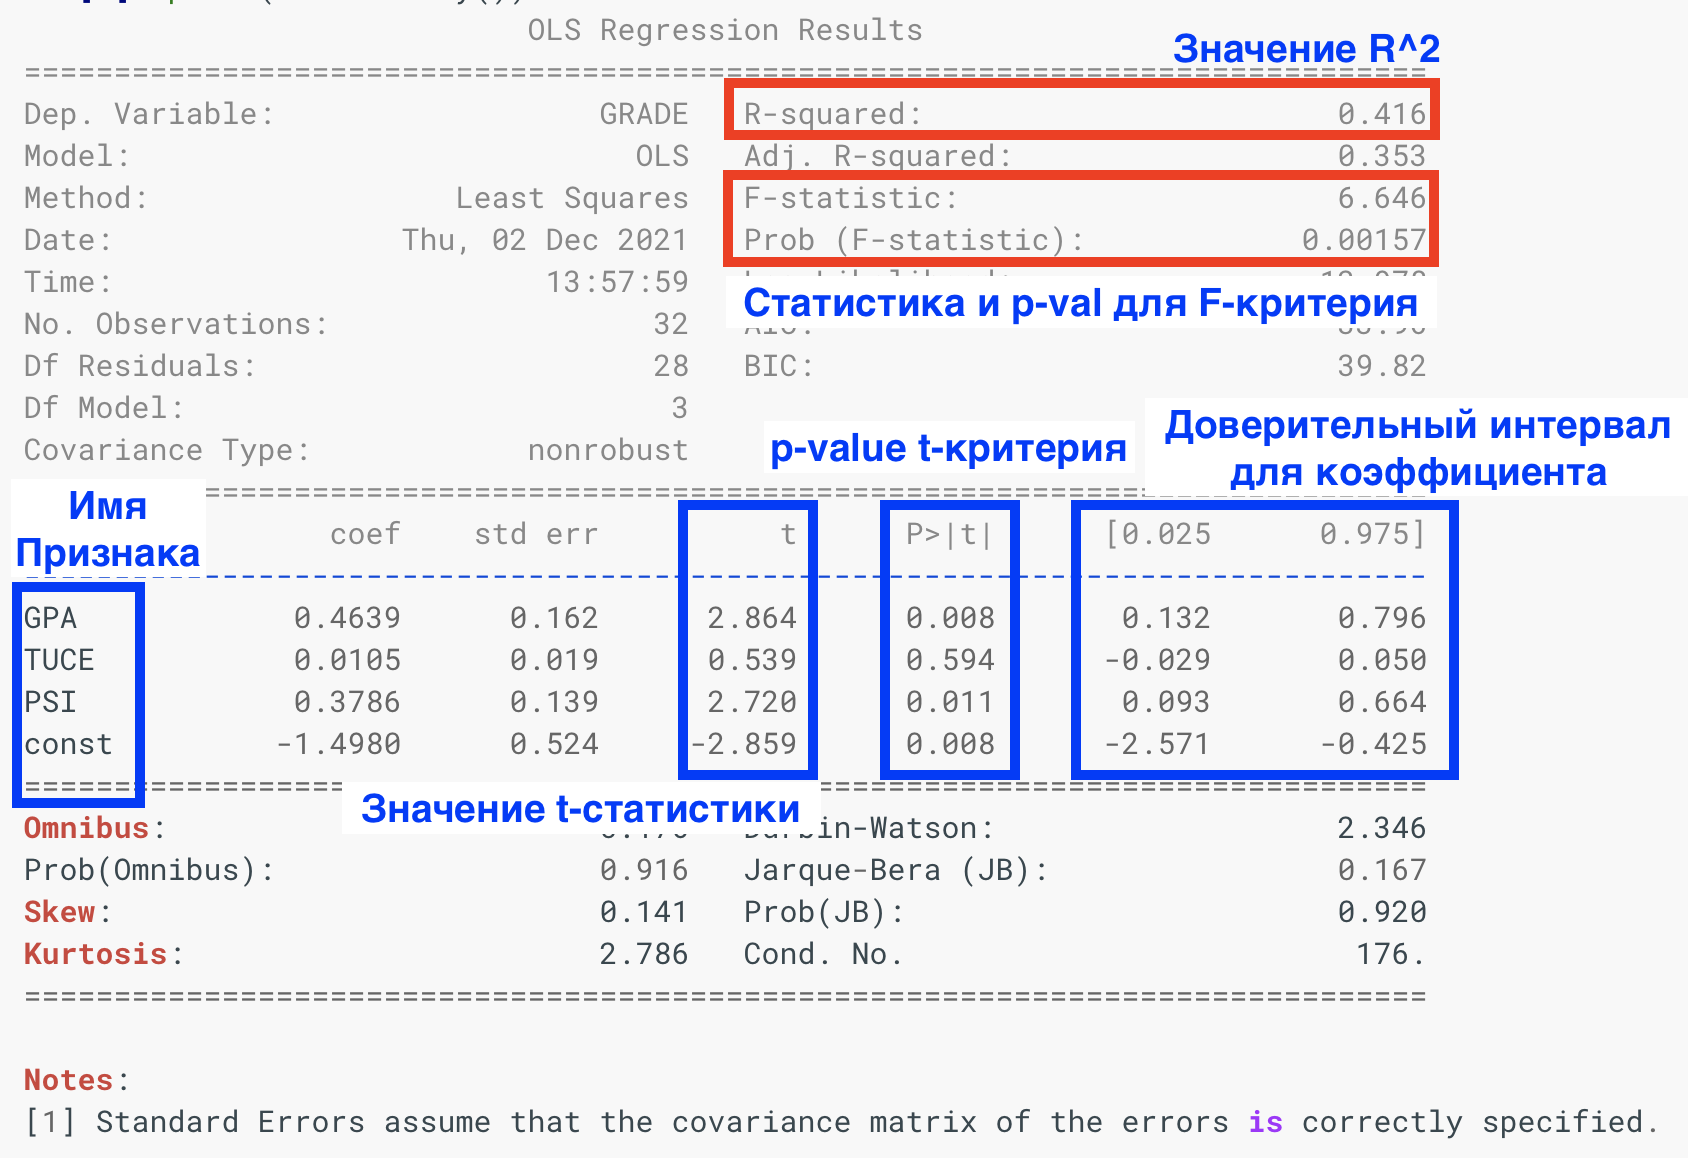


В примере название фичей намеренно изменены.

Можно заметить, что сверху располагается уже известный вам $R^2$. Далее чуть ниже располагются статистика и p-value (уровень достигаемой значимости) для F-критерия. Проверяется гипотеза о том, что наша модель работает лучше константы.

В мини-таблице есть проверка каждого признака на его значимость в модели с помощью t-критерия. Проверяется гипотеза о том, что модель без этого признака описывает не хуже, чем модель с этим признаком. Если значение p-value низкое, то, вероятно, признак статистически важен для модели. Таким образом можно осуществлять отбор признаков.




Сделайте выводы о том, согласуется ли отбор признаков при помощи p-value с естественной логикой самого признака.

Видим, что значение p-value мало почти у всех признаков (и по сути все они важны и влияют на общее качество дома). Наибольшее p-value у признаков `PoolArea`, что в принципе, на мой взгляд, логично. При покупке дома из перечисленных характеристик я бы меньше всего опирался на размеры бассейна и подвала.

### Гетероскедастичность ошибки

Оценка, полученная с помощью гауссовской линейной модели будет справдлива лишь при выполнении условия гомоскедастичности остатков. Для проверки на гомоскедастичность часто используют критерий Бройша — Пагана. Мы не будем вдаваться в детали и доказательство того, что критерий валидный и работает правильно. Итак, критерий Бройша — Пагана проверяет нулевую гипотезу о гомоскедастичности распределения данных против альтернативы, то есть гетероскедастичности. Если нулевая гипотеза отвергается, то можно сказать, что данные распределены ГЕТЕРОскедастично. Мы этого не хотим.

Критерий реализован с помощью функции ``sms.diagnostic.het_breuschpagan``. Документацию можно найти [здесь](https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.het_breuschpagan.html).

Остатки модели можно из поля ``fitted_model.resid``, а параметры из ``fitted_model.model.exog``.

Нас интересует p-value для множителя Лагранжа.

В ячейке ниже получите уровень достигаемой значимости для критерия Бройша — Пагана.

In [49]:
p_val_het = sms.diagnostic.het_breuschpagan(resid=fitted_simple_model.resid,
                                            exog_het=fitted_simple_model.model.exog)[1]

print(f"p-value simple: {p_val_het}")

p-value simple: 1.0838690815435224e-95


Отвергается ли гипотеза о гомоскедастичности остатков (определение из будущего: гипотеза отвергается, если p-value < 0.05 и это значит, что её утверждение полагается неверным)? Что это означает?

**Ответ:**

Отвергается (p-value очень и очень мало), то есть данные распределены ГЕТЕРОскедастично и гауссовская линейная модель неприменима.

В случаях, когда распределения остатков не является гомоскедастичном оценка по-прежнему остается несмещенной, однако стоит сделать некоторую поправку, на более высокую дисперсию. Поэтому значения F-критериев и t-критериев для коэффициентов стоит пересмотреть. Для таких случаев существует достаточно много различных поправок, одно из семейств таких поправок называется поправки Уайта на гетероскедастичность. Ниже мы попробуем использовать одну из поправок.

Для этого, в ячейке ниже, обучите линейную модель, но на этот раз передайте в метод ``.fit`` аргумент ``cov_type="HC1"``.

Получите summary для такой модели.

In [50]:
white_model = simple_model.fit(cov_type="HC1")
print(white_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     274.7
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          4.01e-284
Time:                        23:50:42   Log-Likelihood:                -17487.
No. Observations:                1460   AIC:                         3.499e+04
Df Residuals:                    1451   BIC:                         3.504e+04
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.503e+05   9602.612    -15.651   

Проанализируйте результаты. Как изменились p-value для t-критериев? Как изменился коэффициент $R^2$?

**Ответ:**

p-value сильно увеличилось для признаков `PoolArea` и `TotalBsmtSF`, что вполне согласуется с реальностью. Коэффициент $R^2$ не изменился.

Теперь мы действительно можем оценивать то, насколько важен тот или иной признак. Давайте отфильтруем наш датасет и оставим в нем только значимые признаки на уровне значимости $\alpha = 0.05$. (используйте t-критерий).



Из summary имеем: значимые признаки (уровня значимости $\alpha=0.05$) $-$ все, кроме указанных `PoolArea`.
Признак `TotalBsmtSF` установленный порог не превысил, однако оставив его, в конце задания я получил, что p-value в конечной модели 0.051 $-$ плохо, так что тоже удалю.

In [51]:
new_filtered_df = filtered_df.drop(columns={'PoolArea', 'TotalBsmtSF'})
new_filtered_df

,GrLivArea,ExterQual,KitchenQual,GarageArea,BsmtQual,GarageFinish,SalePrice
0,1710,4,4,548,4,2,208500
1,1262,3,3,460,4,2,181500
2,1786,4,4,608,4,2,223500
3,1717,3,4,642,3,1,140000
4,2198,4,4,836,4,2,250000
...,...,...,...,...,...,...,...
1455,1647,3,3,460,4,2,175000
1456,2073,3,3,500,4,1,210000
1457,2340,5,4,252,3,2,266500
1458,1078,3,4,240,3,1,142125


Теперь снова обучим новую модель только на значимых признаках и получим summary. Не забудьте про поправку Уайта!

In [52]:
new_formula = "SalePrice ~ " + " + ".join(np.array(new_filtered_df.columns)[:-1])

print(new_formula)

SalePrice ~ GrLivArea + ExterQual + KitchenQual + GarageArea + BsmtQual + GarageFinish


In [53]:
new_simple_model = smf.ols(new_formula, data=new_filtered_df)

new_white_model = new_simple_model.fit(cov_type="HC1")

print(new_white_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     289.5
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          6.17e-244
Time:                        23:50:42   Log-Likelihood:                -17519.
No. Observations:                1460   AIC:                         3.505e+04
Df Residuals:                    1453   BIC:                         3.509e+04
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.563e+05   1.12e+04    -13.911   

Как изменился коэффициент $R^2$? Всегда ли бОльший $R^2$ говорит о правильной модели? Расскажите о своих рассуждениях!

**Ответ:**

$R^2$ уменьшился всего на 0.01, AIC и BIC тоже практически не изменились.
Конечная модель целесообразнее предыдущих: мы избавились от корреляций и выкинули незначимые признаки + использовали поправку Уайта. При этом значение $R^2$ не возросло, а даже уменьшилось, пусть и совсем незначительно. Так что $R^2$ больше не означает, что модель корректнее.

### Преобразование целевого признака

Обратим свое внимание на целевую переменную. Ниже постройте гистограммы для признака ``SalePrice``. А так же для логарифма от ``SalePrice``. Сделайте это на разных картинках. Можно использовать subplot.

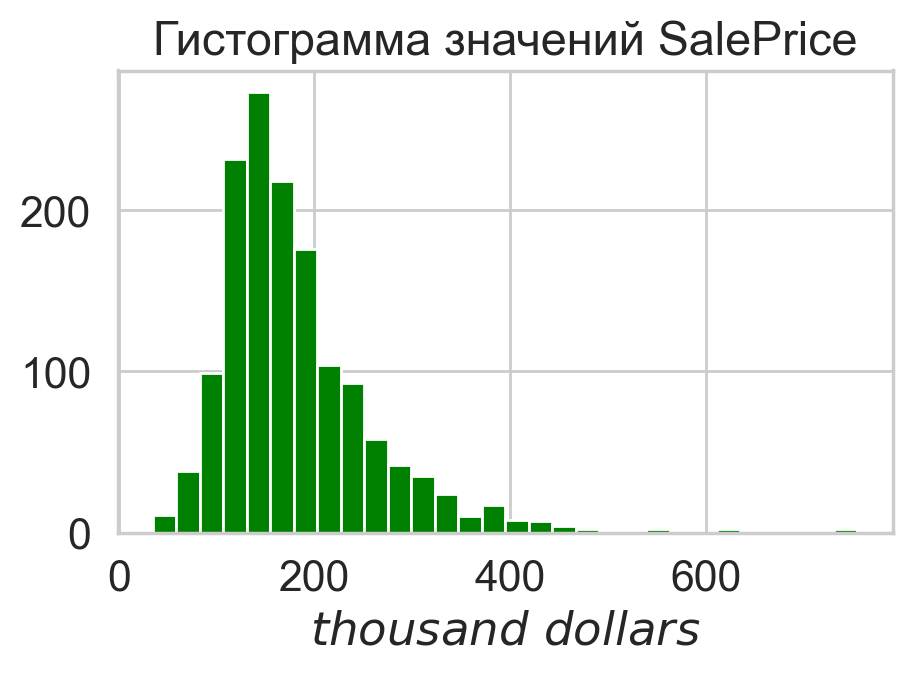

In [54]:
plt.figure(figsize=(5, 3))
plt.hist(df['SalePrice'] / 1000, color='green', bins=30)
plt.xlabel('$thousand\ dollars$')
plt.title("Гистограмма значений SalePrice") 
plt.plot()
plt.show()

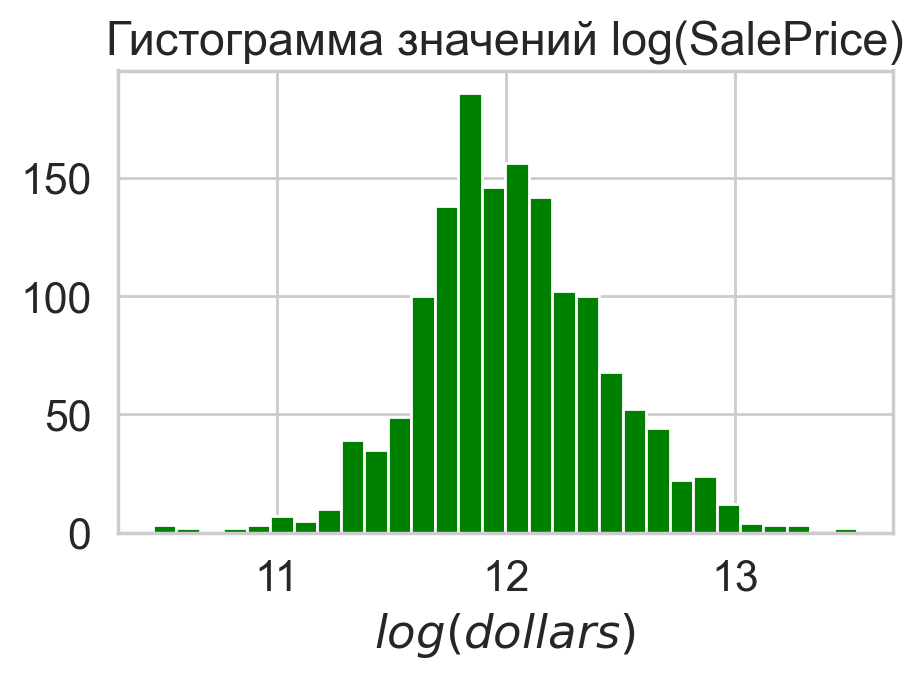

In [55]:
plt.figure(figsize=(5, 3))
plt.hist(np.log(df['SalePrice']), color='green', bins=30)
plt.xlabel('$log(dollars)$')
plt.title("Гистограмма значений log(SalePrice)") 
plt.show()

Какой из графиков выглядит более "Гауссовским"?

**Ответ:**

Исходя из заданий ниже, где я всё это проверю, сейчас я должен оценить "на глаз". График от логарифма больше похож на гауссовский.

Теперь давайте снова посмотрим на распределение остатков от линейной модели. Начертим qqplot для нормального распределения и гистограмму остатков.

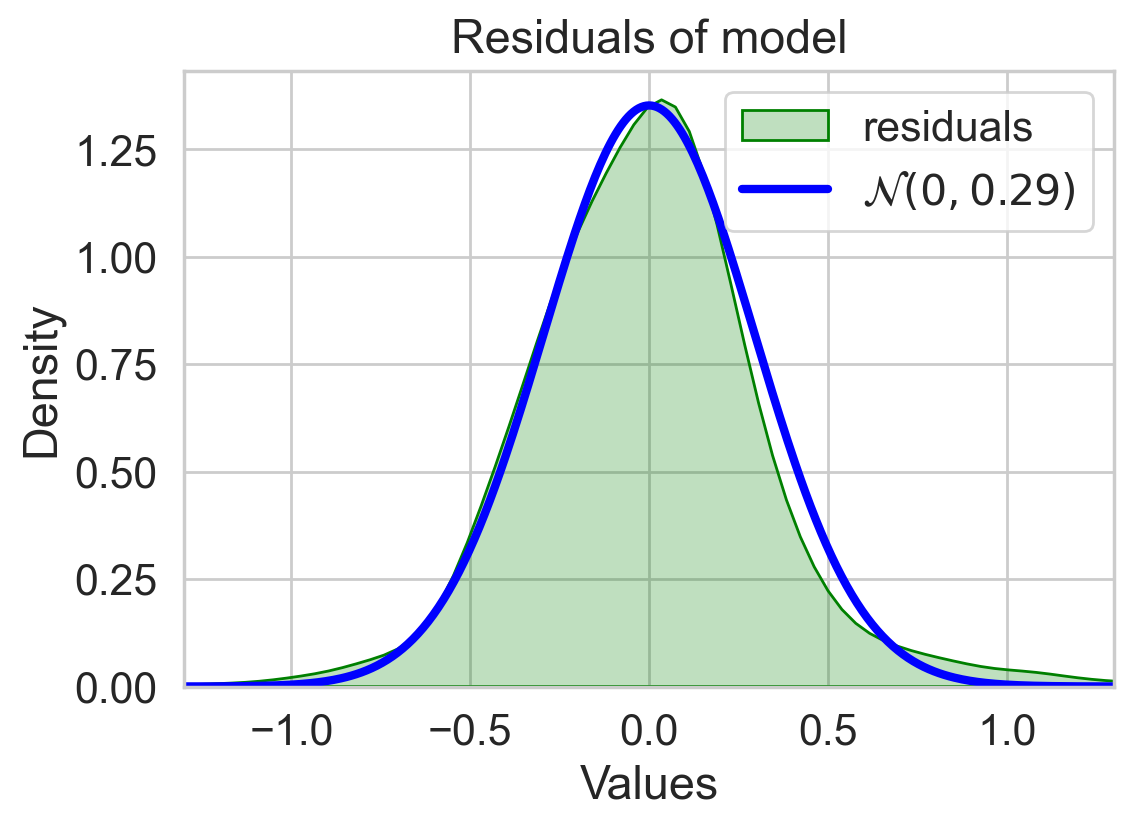

In [56]:
plt.figure(figsize=(6, 4))
residuals = new_white_model.resid / 100000
sns.kdeplot(residuals, color='green', fill=True, label='residuals')
grid = np.linspace(min(residuals), max(residuals), 1000)
loc = np.mean(residuals)
scale = 0.295
plt.plot(grid, sps.norm.pdf(grid, loc=loc, scale=scale), color='blue', linewidth=3, label='$\mathcal{N}(%.0f,%.2f)$' %(loc, scale))
xmin = -1.3
xmax = 1.3
plt.xlim(xmin, xmax)
plt.title('Residuals of model')
plt.ylabel('Density')
plt.xlabel('Values')
plt.legend()
plt.show()

Как вы считаете, можно ли сказать, что распределение остатков это нормальное распределение?

**Ответ:**

На графике для сравнения показано нормальное распределение с некоторыми параметрами $-$ определённо заключаем, что остатки модели можно считать нормально распределёнными.

Давайте обучим модель предсказывать не SalePrice, а ее логарифм. Для этого снова обновим формулу для модели. Прелесть формул в том, что в них можно использовать операции из numpy. Например можно искать зависимость не от ``PoolArea``, а от ее квадрата, то есть ``np.power(PoolArea, 2)``. Достаточно просто добавить в формулу ..." + np.power(PoolArea, 2)" и все заработает!

В ячейке ниже обучите модель предсказывать логарифм SalePrice. Получите summary этой модели.

In [57]:
log_formula = "np.log(SalePrice) ~ " + " + ".join(np.array(new_filtered_df.columns)[:-1])

print(log_formula)

np.log(SalePrice) ~ GrLivArea + ExterQual + KitchenQual + GarageArea + BsmtQual + GarageFinish


In [58]:
log_simple_model = smf.ols(log_formula, data=new_filtered_df)

log_model = log_simple_model.fit(cov_type="HC1")

print(log_model.summary())

                            OLS Regression Results                            
Dep. Variable:      np.log(SalePrice)   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     542.1
Date:                Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:50:43   Log-Likelihood:                 382.03
No. Observations:                1460   AIC:                            -750.1
Df Residuals:                    1453   BIC:                            -713.1
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.3699      0.043    242.206   

Как изменился коэффициент R^2? Модель лучше стала понимать данные?

**Ответ:** 

Круто!!! $R^2$ увеличился, притом AIC и BIC значительно уменьшились и все признаки значимые.
Модель точнее как с точки зрения логики построения, так и с точки зрения перечисленных точностей.

Постройте графики, аналогичные тем, что встретились нам на две ячейки выше (qqplot и гистограмму остатков). Но на этот раз для модели, предсказывающей логарифм.

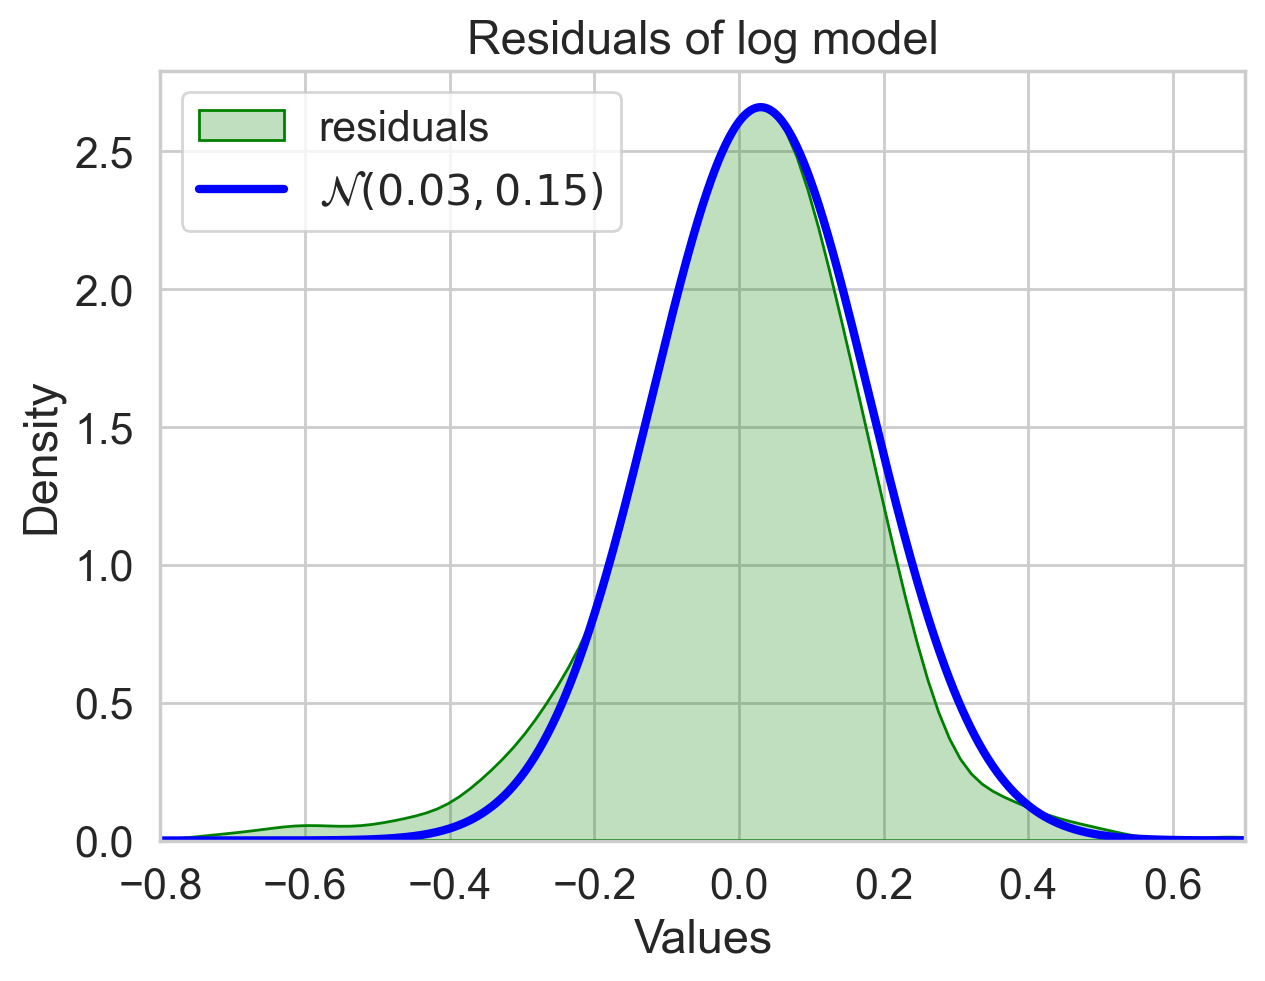

In [59]:
plt.figure(figsize=(7,5))
sns.kdeplot(log_model.resid, color='green', fill=True, label='residuals')
xmin = -0.8
xmax = 0.7
plt.xlim(xmin, xmax)
grid = np.linspace(xmin, xmax, 1000)
loc = 0.03
scale = 0.15
plt.plot(grid, sps.norm.pdf(grid, loc=loc, scale=scale), color='blue', linewidth=3, label='$\mathcal{N}(%.2f,%.2f)$' %(loc, scale))
plt.title('Residuals of log model')
plt.ylabel('Density')
plt.xlabel('Values')
plt.legend()
plt.show()

Как вы считаете, стоит ли предсказывать логарифм от цены? В каких случаях это полезно?

**Ответ:**

Предсказывать логарифм цены оказалось осмысленно. В принципе, объяснение этому додумать несложно:

Глобально дома в конечном счёте делятся на категории "Шикарный дом" и речь идёт о суммах вплоть до миллиона долларов: 

In [60]:
max(df['SalePrice'])

755000

Бывают, напротив, дома совершенно невзрачные и их стоимости укладываются всего в десятки тысяч долларов:

In [61]:
min(df['SalePrice'])

34900

Но в среднем стоимость домов колеблется около двух сотен тысяч долларов:

In [62]:
int(np.mean(df['SalePrice']))

180921

Такая разница значений цен не укладывается в один разряд десятков и брать логарифм от цены весьма осмысленно.

## Бонусная часть (10 баллов)

Подойдём к задаче регрессии с байесовской точки зрения. Полезно изучить разделы 8.1, 8.2 конспекта Д.П.Вектрова (https://vk.com/doc126754362_500465695?hash=uU7RYUtCmrntB7ynduiZlYgZuR5C4oSnXqB5nXW0DEk&dl=votNcsozZKYk4ZLO546dYTZd17B3eHok2xSVQP6F6ic)

Только в начале дочитайте задание, а потом лезьте в конспект.

Мы Вам предлагаем увидеть, как при помощи байесовского подхода выбрать важные признаки регрессионной модели. Рекомендуем проделать выкладки без "подглядывания" в конспект.

1) Запишите байесовскую постановку задачи регрессии. Не забудьте про априорное распределение -- регуляризацию (пусть она для всех компонент одинаковая). Регуляризовать будем нормальным распределением, более того считать его компоненты независимыми (матрица ковариаций будет диагональна)

$$w_{MP} = arg \max_w p(t | X, w)p(w)$$
$$p(w|\alpha) = \mathcal{N}(w|0, \alpha^{-1}I)$$
Решаем задачу экстремума апостериорной плотности:
$$-\dfrac{1}{2\sigma^2}\sum_{i=1}^n\lr{t_i - \phi(x_i)}^2 - \dfrac{\alpha}{2}\norm{w}^2 \to \max_w$$

2) Каким будет аналитическое решение, если бы мы реализовывали "байес для бедных"? Какую роль играет регуляризация?

Решение 
$$w_{MP} = \lr{\sigma^{-2}\Phi^T\Phi + \alpha I}^{-1}\sigma^{-2}\Phi^Tt$$
Где регуляризация выражена в переходе от 
$\lr{\Phi^T\Phi}^{-1}\Phi^Tt \hspace{1cm} \text{ к } \hspace{1cm} \lr{\sigma^{-2}\Phi^T\Phi + \alpha I}^{-1}\sigma^{-2}\Phi^Tt$
Так мы решаем проблему вырожденности матрицы $\Phi^T\Phi$, добавляя $\alpha$ к $\Phi$  на  диагональ

3) Теперь, когда Вы выяснили роль регуляризации давайте вместо диагональной матрицы с одинаковыми значениями на диагонали в качестве априорного распределения возьмём разные значения. Как изменится решение? Что произойдёт с теми признаками, у которых априорная дисперсия высокая? А низкая?

4) В вариационном байесовском выводе у Вас появился интересный объект в знаменателе -- интеграл по всему пространству параметров от регуляризированного правдоподобия. Это называется *обоснованностью* параметрической модели. Чем она выше -- тем лучше заданное семейство распределений описывает Ваши данные.

Прочитайте статью на википедии о бритве Оккама и критерии фальсифицируемости Поппера и ещё раз посмотрите на знаменатель. Порассуждайте о том, почему более обоснованные модели выше.

**Ваш философский ответ:**

А теперь откройте главу 8 конспекта Ветрова и изучите алгоритм максимизации обоснованности.

Напишите его.

Изучите дисперсии, которые получатся после 30 итераций (или сколько Вам понадобится для сходимости). Подумайте, почему алгоритм счёл одни признаки полезнее других. Визуализируйте распределение признака и его дисперсию. Сделайте выводы.

**Вывод:**